In [2]:
#installing selenium
!pip install selenium

In [3]:
#importing necessary libraries
import selenium
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException as e
from selenium.webdriver.common.keys import Keys
import pandas as pd

# AMAZON - Mobiles

In [23]:
#opening chrome using driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [24]:
#visiting the website
driver.get('https://www.amazon.in')

In [25]:
#to maximize the window
driver.maximize_window()

In [26]:
# Search for a product in search box
search_box=driver.find_element_by_id("twotabsearchtextbox")
search_box.send_keys('Mobile')
search_box.send_keys(Keys.ENTER)

In [27]:
#Scraping the links of product from multiple pages.
links=[]
for i in range(1,21):
    url=driver.get('https://www.amazon.in/s?k=mobile+mobile&page={}&qid=1625408837&ref=sr_pg_{}'.format(i,i))
    mobile_link=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']//a")
    for i in mobile_link:
        links.append(i.get_attribute('href'))

In [28]:
#checking the number of links we scraped.
len(links)

341

In [29]:
#fetching information from all the links now.

reviews=[]
ratings=[]
for i in links:
    driver.get(i)
            
    #scraping the body of the review
    try:
        rev=driver.find_elements_by_xpath("//div[@class='a-section review aok-relative']//div//div//div[4]/span")
        for j in rev:
            reviews.append(j.text.strip())
    except e:
        reviews.append(" ")
        
        
    #scraping the ratings     
    try:
        rate=driver.find_elements_by_xpath("//div[@class='a-section celwidget']//div[2]//a[1][@class='a-link-normal']")
        for j in rate:
            ratings.append(float(j.get_attribute('title').replace('out of 5 stars','').strip()))
    except e:
        ratings.append(" ") 

In [30]:
#checking the length of ratings and reviews
print('Number of reviews: {} \nNumber of ratings: {}'.format(len(reviews),len(ratings)))

Number of reviews: 2010 
Number of ratings: 2010


In [31]:
#storing the data into a dataframe
phone_amazon=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
phone_amazon

Reviews  Ratings
0     Greatest deal for Snapdragon 750 that too with...      5.0
1     Edit after a month of usage -\n1. Best in clas...      5.0
2                 Not.much excited compare to other all      1.0
3     Please don't waste your money on this phone, I...      2.0
4     Got this for my mom. She loves it. The battery...      5.0
...                                                 ...      ...
2005  Samsung says that this phone has one of the mo...      2.0
2006                                     Yeah it's good      5.0
2007                                     All is well...      4.0
2008  Samsung could have used their best processors ...      5.0
2009  Good one smooth and fast. Display also good. A...      5.0

[2010 rows x 2 columns]

In [32]:
#saving the scraped recprds into a csv file
phone_amazon.to_csv('mobile_amazon.csv')

In [33]:
#closong the driver
driver.close()

# Amazon- LAPTOP

In [34]:
#Scraping the reviews and rating for LAPTOPS
#opening chrome using webdriver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [35]:
#visiting the website
driver.get('https://www.amazon.in')

In [36]:
#to maximize the window
driver.maximize_window()

In [37]:
#code to search for the product in search box
search_box=driver.find_element_by_id("twotabsearchtextbox")
search_box.send_keys('Laptop')
search_box.send_keys(Keys.ENTER)

In [38]:
#scraping the links for laptops from multiple pages
links=[]
for i in range(1,21):
    url=driver.get('https://www.amazon.in/s?k=Laptop&page={}&qid=1625412200&ref=sr_pg_{}'.format(i,i))
    laptop_link=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']//a")
    for j in laptop_link:
        links.append(j.get_attribute('href'))

In [39]:
#checking the number of links scraped
len(links)

426

In [40]:
#scraping reviews and ratings from the links
reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    
    #scraping the body of the review
    try:
        rev=driver.find_elements_by_xpath("//div[@class='a-section review aok-relative']//div//div//div[4]/span")
        for j in rev:
            reviews.append(j.text.strip())
    except e:
        reviews.append(" ")
        
        
    #scraping the ratings     
    try:
        rate=driver.find_elements_by_xpath("//div[@class='a-section celwidget']//div[2]//a[1][@class='a-link-normal']")
        for j in rate:
            ratings.append(float(j.get_attribute('title').replace('out of 5 stars','').strip()))
    except e:
        ratings.append(" ") 

In [41]:
#checking the number of reviews and ratings scraped
print('Number of reviews: {} \nNumber of ratings: {}'.format(len(reviews),len(ratings)))

Number of reviews: 2062 
Number of ratings: 2062


In [42]:
#storing the reviews and ratings ina dataframe
laptop_amazon=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
laptop_amazon

Reviews  Ratings
0     Very slow and not good 8gb ram according speed...      4.0
1     Really hate the product. Its wastage of money....      1.0
2                                  The Product Worth it      5.0
3     Your browser does not support HTML5 video.\n P...      1.0
4     This is a review after more than 6 months of u...      2.0
...                                                 ...      ...
2057  I like every aspect of it- the audio system is...      5.0
2058  This lenovo ideapad gaming 3 laptop is good no...      5.0
2059  After using just 3 days ..it getting slow,fast...      3.0
2060                                       Nice product      5.0
2061                                          Excellent      5.0

[2062 rows x 2 columns]

In [43]:
#saving the records into a csv file
laptop_amazon.to_csv('laptop_amazon.csv')

In [44]:
#closing the driver
driver.close()

# Amazon-Headphones

In [45]:
#Scraping the reviews and rating for HEADPHONES
#opening the webdriver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [46]:
#visiting the website
driver.get('https://www.amazon.in')

In [47]:
#to maximize the window
driver.maximize_window()

In [48]:
#searching for the product using search box
search_box=driver.find_element_by_id("twotabsearchtextbox")
search_box.send_keys('Headphones')
search_box.send_keys(Keys.ENTER)

In [49]:
#scraping the links of the products from multiple pages
links=[]
for i in range(1,21):
    url=driver.get('https://www.amazon.in/s?k=Headphones&page={}&qid=1625413956&ref=sr_pg_{}'.format(i,i))
    headphone_link=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']//a")
    for j in headphone_link:
        links.append(j.get_attribute('href'))

In [50]:
#checking the number of links scraped
len(links)

430

In [51]:
#scraping the information from the links 
reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    
    #scraping the body of the review
    try:
        rev=driver.find_elements_by_xpath("//div[@class='a-section review aok-relative']//div//div//div[4]/span")
        for j in rev:
            reviews.append(j.text.strip())
    except e:
        reviews.append(" ")
        
        
    #scraping the ratings     
    try:
        rate=driver.find_elements_by_xpath("//div[@class='a-section celwidget']//div[2]//a[1][@class='a-link-normal']")
        for j in rate:
            ratings.append(float(j.get_attribute('title').replace('out of 5 stars','').strip()))
    except e:
        ratings.append(" ") 

In [52]:
#checkingthe lenght of reviews and ratings
print('Length of reviews: ',len(reviews),'\nLength of ratings: ',len(ratings))

Length of reviews:  2252 
Length of ratings:  2252


In [53]:
#storing the records into a dataframe 
headphones_amazon=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
headphones_amazon

Reviews  Ratings
0     I gifted it for my husband.. pretty good sound...      4.0
1     Pros:\n-Sound quality is awesome.\n-Comfortabl...      3.0
2     Design: a retro look, good touch and feel avai...      5.0
3     SOUND: if you hear at 80% volume it's very goo...      3.0
4     Received the box open with tapes unsticky.\n\n...      1.0
...                                                 ...      ...
2247  Well, In one line, This is an Amazing product....      5.0
2248  Good earphone, works in mono mode (connecting ...      5.0
2249  As many other users have already pointed out, ...      2.0
2250  1.The product does not have Qualcomm aptX, it ...      1.0
2251  Issues faced from first day...\n\n1. There is ...      2.0

[2252 rows x 2 columns]

In [54]:
#saving the records into a csv file
headphones_amazon.to_csv('headphones_amazon.csv')

In [55]:
#closing the driver
driver.close()

# Amazon- SMART WATCH

In [56]:
#Scraping the reviews and rating for SMART WATCH
driver=webdriver.Chrome('C:\chromedriver.exe')

In [57]:
#visitng the website
driver.get('https://www.amazon.in')

In [58]:
#to maximize the window
driver.maximize_window()

In [59]:
#searching for the product using search box
search_box=driver.find_element_by_id("twotabsearchtextbox")
search_box.send_keys('Smart watch')
search_box.send_keys(Keys.ENTER)

In [60]:
#scraping the links of products from multiple pages
links=[]
for i in range(1,21):
    url=driver.get('https://www.amazon.in/s?k=Smart+watch&page={}&qid=1625419508&ref=sr_pg_{}'.format(i,i))
    smartwatch_link=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']//a")
    for j in smartwatch_link:
        links.append(j.get_attribute('href'))

In [61]:
#checking the number of links scraped
len(links)

426

In [62]:
#scraping the information from links
reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    
    #scraping the body of the review
    try:
        rev=driver.find_elements_by_xpath("//div[@class='a-section review aok-relative']//div//div//div[4]/span")
        for j in rev:
            reviews.append(j.text.strip())
    except e:
        reviews.append(" ")
        
        
    #scraping the ratings     
    try:
        rate=driver.find_elements_by_xpath("//div[@class='a-section celwidget']//div[2]//a[1][@class='a-link-normal']")
        for j in rate:
            ratings.append(float(j.get_attribute('title').replace('out of 5 stars','').strip()))
    except e:
        ratings.append(" ") 

In [63]:
#checking the length of reviews and ratings
print('Length of reviews: ',len(reviews),'\nLength of ratings: ',len(ratings))

Length of reviews:  1732 
Length of ratings:  1732


In [64]:
#storing the reveiews and rating sinto a dataframe
smartwatch_amazon=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
smartwatch_amazon

Reviews  Ratings
0     Initial Review after 2 days of usage;\n\nHeart...      3.0
1     BP Measurement is way different from a standar...      1.0
2     Loved the product - body temperature, heart ra...      5.0
3     I have been using samsung S2 and then honor ma...      1.0
4     I am writing the review after 3 day use...\nPR...      5.0
...                                                 ...      ...
1727    Perfect fit for oneplus watch 46mm nice product      5.0
1728  Perfect for for Noise endure smart watch.\nCom...      5.0
1729                                    value for money      5.0
1730  Worst product, damaged product, pin not included.      1.0
1731                                  Very good product      5.0

[1732 rows x 2 columns]

In [65]:
#saving the dataframe into a csv file
smartwatch_amazon.to_csv('smartwatch_amazon.csv')

# AMAZON- PROFESSIONAL CAMERAS

In [66]:
#Scraping the reviews and rating for Professional Cameras
driver=webdriver.Chrome('C:\chromedriver.exe')

In [67]:
#visiting the website
driver.get('https://www.amazon.in')

In [68]:
#to maximize the window
driver.maximize_window()

In [69]:
#searching for the product using search box
search_box=driver.find_element_by_id("twotabsearchtextbox")
search_box.send_keys('Professional cameras')
search_box.send_keys(Keys.ENTER)

In [70]:
#scraping the links of products from multiple pages
links=[]
for i in range(1,21):
    url=driver.get('https://www.amazon.in/s?k=Professional+cameras&page={}&qid=1625423598&ref=sr_pg_{}'.format(i,i))
    camera_link=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']//a")
    for j in camera_link:
        links.append(j.get_attribute('href'))

In [71]:
#checking the number of links scraped
len(links)

430

In [72]:
#scraping ratings snd reviews from the links
reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    
    #scraping the body of the review
    try:
        rev=driver.find_elements_by_xpath("//div[@class='a-section review aok-relative']//div//div//div[4]/span")
        for j in rev:
            reviews.append(j.text.strip())
    except e:
        reviews.append(" ")
        
        
    #scraping the ratings     
    try:
        rate=driver.find_elements_by_xpath("//div[@class='a-section celwidget']//div[2]//a[1][@class='a-link-normal']")
        for j in rate:
            ratings.append(float(j.get_attribute('title').replace('out of 5 stars','').strip()))
    except e:
        ratings.append(" ") 

In [73]:
#checking the length of reviews and ratings
print('Length of reviews: ',len(reviews),'\nLength of ratings: ',len(ratings))

Length of reviews:  1136 
Length of ratings:  1136


In [74]:
#storing information into a dataframe
prof_camera_amazon=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
prof_camera_amazon

Reviews  Ratings
0     This is my first high-quality camera. And, I a...      5.0
1     I bought this to replace my Canon 600D DSLR ca...      5.0
2     Overall great camera and is highly capable\n\n...      5.0
3     Never Buy Online.\n\nI bought one month ago. F...      1.0
4     It worked for couple of clicks and then sudden...      1.0
...                                                 ...      ...
1131  I am a beginner at using Flash and was looking...      5.0
1132  These Flash Diffusers are really cool, and if ...      5.0
1133  Didn't expect much but was hugely surprised! G...      5.0
1134  Does the job ... Way cheaper than magmod but d...      5.0
1135  Amazing Product . its helpful for wedding and ...      5.0

[1136 rows x 2 columns]

In [75]:
#saving dataframe as a csv file
prof_camera_amazon.to_csv('prof_camera_amazon.csv')

In [76]:
#closing the driver
driver.close()

# AMAZON - PRINTERS

In [77]:
#Scraping the reviews and rating for Printers
#opening the driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [78]:
#visiting the website
driver.get('https://www.amazon.in')

In [79]:
#to maximize the window
driver.maximize_window()

In [80]:
#code to search the search box to enter the desired product to be searched for.
search_box=driver.find_element_by_id("twotabsearchtextbox")
search_box.send_keys('Printers')
search_box.send_keys(Keys.ENTER)

In [81]:
#scraping the links of each printer from multiple pages
links=[]
for i in range(1,21):
    url=driver.get('https://www.amazon.in/s?k=Printers&page={}&qid=1625479858&ref=sr_pg_{}'.format(i,i))
    printer_link=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']//a")
    for j in printer_link:
        links.append(j.get_attribute('href'))

In [82]:
#checking the number of links of printers scraped
len(links)

339

In [83]:
#code to scrape the review and rating from the links of printers scraped above
reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    
    #scraping the body of the review
    try:
        rev=driver.find_elements_by_xpath("//div[@class='a-section review aok-relative']//div//div//div[4]/span")
        for j in rev:
            reviews.append(j.text.strip())
    except e:
        reviews.append(" ")
        
        
    #scraping the ratings     
    try:
        rate=driver.find_elements_by_xpath("//div[@class='a-section celwidget']//div[2]//a[1][@class='a-link-normal']")
        for j in rate:
            ratings.append(float(j.get_attribute('title').replace('out of 5 stars','').strip()))
    except e:
        ratings.append(" ") 

In [84]:
#checking the length of reviews and ratings
print('Length of reviews: ',len(reviews),'\nLength of ratings: ',len(ratings))

Length of reviews:  1250 
Length of ratings:  1250


In [85]:
#storing information into a dataframe
printers_amazon=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
printers_amazon

Reviews  Ratings
0     Inaccurate images of product. The first image ...      1.0
1     This is not a wireless printer. However hp sto...      1.0
2     Printer work fine .colour combination very nic...      3.0
3     मैने hp स्मार्ट टैंक 500 लिया परन्तु उसमे wifi...      2.0
4     Didn't like the product.. amazon is not allowi...      1.0
...                                                 ...      ...
1245                      Excellent product and service      5.0
1246                                 It works very well      5.0
1247         Product is prowiding other then displaying      1.0
1248                          Very Low quality products      2.0
1249                                       Good product      4.0

[1250 rows x 2 columns]

In [86]:
#saving records into a csv file
printers_amazon.to_csv('printers_amazon.csv')

In [87]:
#closing the driver
driver.close()

# AMAZON- Monitors

In [89]:
#Scraping the reviews and rating for Monitors
#opening the driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [90]:
#visiting the website
driver.get('https://www.amazon.in')

In [91]:
#to maximize the window
driver.maximize_window()

In [92]:
#code to search the search box to enter the desired product to be searched for.
search_box=driver.find_element_by_id("twotabsearchtextbox")
search_box.send_keys('Monitors')
search_box.send_keys(Keys.ENTER)

In [93]:
#scraping the links of each printer from multiple pages
links=[]
for i in range(1,21):
    url=driver.get('https://www.amazon.in/s?k=Monitors&page={}&qid=1625481878&ref=sr_pg_{}'.format(i,i))
    monitors_link=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']//a")
    for j in monitors_link:
        links.append(j.get_attribute('href'))

In [94]:
#checking the number of links scraped
len(links)

336

In [95]:
#code to scrape the review and rating from the links of monitors scraped above
reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    
    #scraping the body of the review
    try:
        rev=driver.find_elements_by_xpath("//div[@class='a-section review aok-relative']//div//div//div[4]/span")
        for j in rev:
            reviews.append(j.text.strip())
    except e:
        reviews.append(" ")
        
        
    #scraping the ratings     
    try:
        rate=driver.find_elements_by_xpath("//div[@class='a-section celwidget']//div[2]//a[1][@class='a-link-normal']")
        for j in rate:
            ratings.append(float(j.get_attribute('title').replace('out of 5 stars','').strip()))
    except e:
        ratings.append(" ") 

In [96]:
#checking the length of revieews and ratings
print('Length of reviews: ',len(reviews),'\nLength of ratings: ',len(ratings))

Length of reviews:  1502 
Length of ratings:  1502


In [97]:
#saving the records into a csv file
monitors_amazon=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
monitors_amazon

Reviews  Ratings
0     I was really looking forward to use this monit...      2.0
1     I bought this monitor a while back and here's ...      5.0
2     Iam quite happy with the performance of the mo...      5.0
3     Received the monitor today and I'm very impres...      1.0
4     Looking at the specs I ordered without any sec...      1.0
...                                                 ...      ...
1497  Good product. But 300+ rs is too much for this...      3.0
1498                                       Good quality      5.0
1499  Based on an IPS panel by Innolux, which is als...      5.0
1500  I'm the first buyer of this product.\nThe one ...      1.0
1501  Hello friends, there is no much reviews availa...      3.0

[1502 rows x 2 columns]

In [98]:
#saving records into a csv file
monitors_amazon.to_csv('monitors_amazon.csv')

In [99]:
#closing the driver
driver.close()

# AMAZON- Home Theatre

In [320]:
#Scraping the reviews and rating for home theatres
#opening the driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [321]:
#visiting the website
driver.get('https://www.amazon.in')

In [322]:
#to maximize the window
driver.maximize_window()

In [323]:
#code to search the search box to enter the desired product to be searched for.
search_box=driver.find_element_by_id("twotabsearchtextbox")
search_box.send_keys('Home theatres')
search_box.send_keys(Keys.ENTER)

In [324]:
#scraping the links of each printer from multiple pages
links=[]
for i in range(1,21):
    url=driver.get('https://www.amazon.in/s?k=Home+theatres&page={}&qid=1625484459&ref=sr_pg_{}'.format(i,i))
    theatre=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']//a")
    for j in theatre:
        links.append(j.get_attribute('href'))

In [325]:
#checking the number of observations scraped
len(links)

429

In [326]:
#code to scrape the review and rating from the links of home theatres scraped above
reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    
    #scraping the body of the review
    try:
        rev=driver.find_elements_by_xpath("//div[@class='a-section review aok-relative']//div//div//div[4]/span")
        for j in rev:
            reviews.append(j.text.strip())
    except e:
        reviews.append(" ")
        
        
    #scraping the ratings     
    try:
        rate=driver.find_elements_by_xpath("//div[@class='a-section celwidget']//div[2]//a[1][@class='a-link-normal']")
        for j in rate:
            ratings.append(float(j.get_attribute('title').replace('out of 5 stars','').strip()))
    except e:
        ratings.append(" ") 

In [327]:
#checking the lengths of ratings and reviews
print('Length of reviews: ',len(reviews),'\nLength of ratings: ',len(ratings))

Length of reviews:  1870 
Length of ratings:  1870


In [328]:
#storing the reviews and ratings into a dataframe
hometheatres_amazon=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
hometheatres_amazon

Reviews  Ratings
0     I bought product when there was not any review...      5.0
1     Sound quality of speaker is above average but ...      1.0
2     By no means Im an audiophile read review at ur...      5.0
3     Your browser does not support HTML5 video.\n T...      1.0
4     1.super clarity\n2.super base\n3.comparing oth...      5.0
...                                                 ...      ...
1865  Your browser does not support HTML5 video.\n R...      4.0
1866  Nice one. High volume for Bluetooth and pendri...      4.0
1867  Your browser does not support HTML5 video.\n S...      5.0
1868  Bogus result. Only irritating buzz. No differe...      1.0
1869  You can't connect FM clearly. Out of 8 channel...      4.0

[1870 rows x 2 columns]

In [330]:
#number of distinct ratings 
hometheatres_amazon['Ratings'].value_counts()

5.0    856
1.0    426
4.0    329
3.0    135
2.0    124
Name: Ratings, dtype: int64

In [109]:
#converting dataframe to a csv file
hometheatres_amazon.to_csv('hometheatres_amazon.csv')

In [110]:
#closing the driver
driver.close()

# AMAZON-Chargers

In [111]:
#Scraping the reviews and rating for chargers
#opening the driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [112]:
#visiting the website
driver.get('https://www.amazon.in')

In [113]:
#to maximize the window
driver.maximize_window()

In [114]:
#code to search the search box to enter the desired product to be searched for.
search_box=driver.find_element_by_id("twotabsearchtextbox")
search_box.send_keys('Chargers')
search_box.send_keys(Keys.ENTER)

In [115]:
#scraping the links of each charger from multiple pages
links=[]
for i in range(1,21):
    url=driver.get('https://www.amazon.in/s?k=Chargers&page={}&qid=1625726696&ref=sr_pg_2{}'.format(i,i))
    link=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']//a")
    for j in link:
        links.append(j.get_attribute('href'))

In [116]:
#checking the number of observations scraped
len(links)

423

In [117]:
#code to scrape the review and rating from the links of chargers scraped above
reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    
    #scraping the body of the review
    try:
        rev=driver.find_elements_by_xpath("//div[@class='a-section review aok-relative']//div//div//div[4]/span")
        for j in rev:
            reviews.append(j.text.strip())
    except e:
        reviews.append(" ")
        
        
    #scraping the ratings     
    try:
        rate=driver.find_elements_by_xpath("//div[@class='a-section celwidget']//div[2]//a[1][@class='a-link-normal']")
        for j in rate:
            ratings.append(float(j.get_attribute('title').replace('out of 5 stars','').strip()))
    except e:
        ratings.append(" ") 

In [118]:
#checking the lengths of ratings and reviews
print('Length of reviews: ',len(reviews),'\nLength of ratings: ',len(ratings))

Length of reviews:  1477 
Length of ratings:  1477


In [121]:
#storing the reviews and ratings into a dataframe
Aamazon=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
Aamazon

Reviews  Ratings
0     Don't buy it guys after seeing reviews I order...      1.0
1     I have an old Dell Venue 8 Pro tablet. Now its...      5.0
2     This is very nice and working fine.\nI checked...      4.0
3     The sheathing started peeling off from both th...      1.0
4     In comparison to the Samsung charger (the blac...      2.0
...                                                 ...      ...
1472  very good quality product and Fast charging wi...      5.0
1473  This is a very good product and very reliable....      5.0
1474  The charger works perfectly fine and can reall...      5.0
1475  This is best charger for Android I use it 2 mo...      5.0
1476  Very good quality and wire length is enough. I...      5.0

[1477 rows x 2 columns]

In [122]:
#checking the number of distinct ratings
Aamazon['Ratings'].value_counts()

5.0    761
1.0    428
4.0    161
2.0     68
3.0     59
Name: Ratings, dtype: int64

In [123]:
#converting dataframe to a csv file
Aamazon.to_csv('chargers_amazon.csv')

In [124]:
#closing the driver
driver.close()

# AMAZON- PENDRIVES

In [369]:
#Scraping the reviews and rating for pendrives
#opening the driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [370]:
#visiting the website
driver.get('https://www.amazon.in')

In [371]:
#to maximize the window
driver.maximize_window()

In [372]:
#code to search the search box to enter the desired product to be searched for.
search_box=driver.find_element_by_id("twotabsearchtextbox")
search_box.send_keys('Pendrives')
search_box.send_keys(Keys.ENTER)

In [373]:
#scraping the links of each pendrive from multiple pages
links=[]
for i in range(1,21):
    url=driver.get('https://www.amazon.in/s?k=Pendrives&page={}&qid=1625726696&ref=sr_pg_2{}'.format(i,i))
    link=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']//a")
    for j in link:
        links.append(j.get_attribute('href'))

In [374]:
#checking the number of observations scraped
len(links)

360

In [375]:
#code to scrape the review and rating from the links of Pendrives scraped above
reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    
    #scraping the body of the review
    try:
        rev=driver.find_elements_by_xpath("//div[@class='a-section review aok-relative']//div//div//div[4]/span")
        for j in rev:
            reviews.append(j.text.strip())
    except e:
        reviews.append(" ")
        
        
    #scraping the ratings     
    try:
        rate=driver.find_elements_by_xpath("//div[@class='a-section celwidget']//div[2]//a[1][@class='a-link-normal']")
        for j in rate:
            ratings.append(float(j.get_attribute('title').replace('out of 5 stars','').strip()))
    except e:
        ratings.append(" ") 

In [376]:
#checking the lengths of ratings and reviews
print('Length of reviews: ',len(reviews),'\nLength of ratings: ',len(ratings))

Length of reviews:  1037 
Length of ratings:  1037


In [377]:
#storing the reviews and ratings into a dataframe
pendrives_amazon=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
pendrives_amazon

Reviews  Ratings
0     Drive is made in Malaysia.\nComes with FAT32.\...      2.0
1     For very large USB drives such as this 512GB S...      5.0
2     The product lives up to expectations in terms ...      4.0
3     Yes, it's really tiny & cute for a 1TB drive t...      2.0
4     I have just got it on my hand with 114 GB (out...      5.0
...                                                 ...      ...
1032                             As expected\nRead more      4.0
1033                            As described\nRead more      5.0
1034                        Lukking nice....\nRead more      4.0
1035                               Very nice\nRead more      5.0
1036                                    Good\nRead more      5.0

[1037 rows x 2 columns]

In [378]:
#checking the number of distinct ratings
pendrives_amazon['Ratings'].value_counts()

5.0    463
1.0    272
4.0    159
3.0     91
2.0     52
Name: Ratings, dtype: int64

In [379]:
#converting dataframe to a csv file
pendrives_amazon.to_csv('pendrives_amazon.csv')

In [380]:
#closing the driver
driver.close()

# AMAZON- MICROWAVES

In [424]:
#Scraping the reviews and rating for MICROWAVES
#opening the driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [425]:
#visiting the website
driver.get('https://www.amazon.in')

In [426]:
#to maximize the window
driver.maximize_window()

In [427]:
#code to search the search box to enter the desired product to be searched for.
search_box=driver.find_element_by_id("twotabsearchtextbox")
search_box.send_keys('Microwaves')
search_box.send_keys(Keys.ENTER)

In [428]:
#scraping the links of each microwaves from multiple pages
links=[]
for i in range(1,21):
    url=driver.get('https://www.amazon.in/s?k=Microwaves&page={}&qid=1625726696&ref=sr_pg_2{}'.format(i,i))
    link=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']//a")
    for j in link:
        links.append(j.get_attribute('href'))

In [429]:
#checking the number of observations scraped
len(links)

338

In [430]:
#code to scrape the review and rating from the links of Microwaves scraped above
reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    
    #scraping the body of the review
    try:
        rev=driver.find_elements_by_xpath("//div[@class='a-section review aok-relative']//div//div//div[4]/span")
        for j in rev:
            reviews.append(j.text.strip())
    except e:
        reviews.append(" ")
        
        
    #scraping the ratings     
    try:
        rate=driver.find_elements_by_xpath("//div[@class='a-section celwidget']//div[2]//a[1][@class='a-link-normal']")
        for j in rate:
            ratings.append(float(j.get_attribute('title').replace('out of 5 stars','').strip()))
    except e:
        ratings.append(" ") 

In [431]:
#checking the lengths of ratings and reviews
print('Length of reviews: ',len(reviews),'\nLength of ratings: ',len(ratings))

Length of reviews:  1115 
Length of ratings:  1115


In [432]:
#storing the reviews and ratings into a dataframe
microwaves_amazon=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
microwaves_amazon

Reviews  Ratings
0     Received damaged product.\nWorst samsung custo...      1.0
1     The product dimensions are not as the actual p...      1.0
2       I crusty plate n powerful steam bowl is missing      1.0
3     Got it in rs 9500 approx\n\nOperation and Usag...      4.0
4     Pros\n1. Cool Premium Design\n2. Ceramic inner...      4.0
...                                                 ...      ...
1110             good product but difficult to operate.      4.0
1111  Perfect cloth cover for oven/ microwave. Quali...      5.0
1112  DON'T BUY BOSCH MICROWAVE!\nFollowing are the ...      1.0
1113                            No product installation      1.0
1114  Dear Bosch,\n\nThis is the 3rd complaints i am...      1.0

[1115 rows x 2 columns]

In [433]:
#checking the number of distinct ratings
microwaves_amazon['Ratings'].value_counts()

5.0    471
1.0    321
4.0    182
3.0     81
2.0     60
Name: Ratings, dtype: int64

In [434]:
#converting dataframe to a csv file
microwaves_amazon.to_csv('microwaves_amazon.csv')

In [435]:
#closing the driver
driver.close()

# AMAZON- Fans

In [478]:
#Scraping the reviews and rating for FANS
#opening the driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [479]:
#visiting the website
driver.get('https://www.amazon.in')

In [480]:
#to maximize the window
driver.maximize_window()

In [481]:
#code to search the search box to enter the desired product to be searched for.
search_box=driver.find_element_by_id("twotabsearchtextbox")
search_box.send_keys('Fans')
search_box.send_keys(Keys.ENTER)

In [483]:
#scraping the links of each FANS from multiple pages
links=[]
for i in range(1,21):
    url=driver.get('https://www.amazon.in/s?k=Fans&page={}&qid=1625726696&ref=sr_pg_2{}'.format(i,i))
    link=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']//a")
    for j in link:
        links.append(j.get_attribute('href'))

In [484]:
#checking the number of observations scraped
len(links)

430

In [485]:
#code to scrape the review and rating from the links of Fans scraped above
reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    
    #scraping the body of the review
    try:
        rev=driver.find_elements_by_xpath("//div[@class='a-section review aok-relative']//div//div//div[4]/span")
        for j in rev:
            reviews.append(j.text.strip())
    except e:
        reviews.append(" ")
        
        
    #scraping the ratings     
    try:
        rate=driver.find_elements_by_xpath("//div[@class='a-section celwidget']//div[2]//a[1][@class='a-link-normal']")
        for j in rate:
            ratings.append(float(j.get_attribute('title').replace('out of 5 stars','').strip()))
    except e:
        ratings.append(" ") 

In [486]:
#checking the lengths of ratings and reviews
print('Length of reviews: ',len(reviews),'\nLength of ratings: ',len(ratings))

Length of reviews:  2246 
Length of ratings:  2246


In [487]:
#storing the reviews and ratings into a dataframe
fans_amazon=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
fans_amazon

Reviews  Ratings
0     Initially I thought it’s good but don’t buy it...      1.0
1     Didn't get the product as I expected. Nice des...      2.0
2     wrost product. Got nonfunctional in 1st week i...      1.0
3     Only ten days,its creating over noise...found ...      2.0
4            Totally disappointed with fan. It's broken      1.0
...                                                 ...      ...
2241  I am using only in night time while sleeping, ...      1.0
2242  I just want to say "THIS PRODUCT IS PERFECT".I...      5.0
2243  Your browser does not support HTML5 video.\n F...      1.0
2244  after start the fan its create a big sound\nit...      1.0
2245  Performance is really good.\nGood quality colo...      5.0

[2246 rows x 2 columns]

In [488]:
#checking the number of distinct ratings
fans_amazon['Ratings'].value_counts()

5.0    827
1.0    656
4.0    376
3.0    221
2.0    166
Name: Ratings, dtype: int64

In [489]:
#converting dataframe to a csv file
fans_amazon.to_csv('fans_amazon.csv')

In [490]:
#closing the driver
driver.close()

# AMAZON- AIR CONDITIONERS

In [501]:
#Scraping the reviews and rating for Air Conditioners
#opening the driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [502]:
#visiting the website
driver.get('https://www.amazon.in')

In [503]:
#to maximize the window
driver.maximize_window()

In [504]:
#code to search the search box to enter the desired product to be searched for.
search_box=driver.find_element_by_id("twotabsearchtextbox")
search_box.send_keys('Air Conditioners')
search_box.send_keys(Keys.ENTER)

In [505]:
#scraping the links of each FANS from multiple pages
links=[]
for i in range(1,21):
    url=driver.get('https://www.amazon.in/s?k=Air Conditioners&page={}&qid=1625726696&ref=sr_pg_2{}'.format(i,i))
    link=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']//a")
    for j in link:
        links.append(j.get_attribute('href'))

In [506]:
#checking the number of observations scraped
len(links)

359

In [507]:
#code to scrape the review and rating from the links of Air Conditioners scraped above.
reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    
    #scraping the body of the review
    try:
        rev=driver.find_elements_by_xpath("//div[@class='a-section review aok-relative']//div//div//div[4]/span")
        for j in rev:
            reviews.append(j.text.strip())
    except e:
        reviews.append(" ")
        
        
    #scraping the ratings     
    try:
        rate=driver.find_elements_by_xpath("//div[@class='a-section celwidget']//div[2]//a[1][@class='a-link-normal']")
        for j in rate:
            ratings.append(float(j.get_attribute('title').replace('out of 5 stars','').strip()))
    except e:
        ratings.append(" ") 

In [508]:
#checking the lengths of ratings and reviews
print('Length of reviews: ',len(reviews),'\nLength of ratings: ',len(ratings))

Length of reviews:  1966 
Length of ratings:  1966


In [509]:
#storing the reviews and ratings into a dataframe
airconditioners_amazon=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
airconditioners_amazon

Reviews  Ratings
0     ** UPDATE ** After more than a year , The prod...      3.0
1     I feel it worth for money. There is no other b...      5.0
2     Hi Amazon,\nwhen I purchase this AC I think it...      1.0
3     Very worst i dont know about the working of ac...      1.0
4     Value for money product. So far good. Good bui...      5.0
...                                                 ...      ...
1961  Bought the AC. No cooling happening on day 1. ...      1.0
1962  If I would have to choose no star then I will ...      1.0
1963  Efficient and effective AC with minimal noise ...      5.0
1964  The AC looks small for 1.8t compared to a blue...      5.0
1965  Cooling is far far better than LG, Samsung or ...      5.0

[1966 rows x 2 columns]

In [510]:
#checking the number of distinct ratings
airconditioners_amazon['Ratings'].value_counts()

5.0    794
1.0    629
4.0    291
3.0    154
2.0     98
Name: Ratings, dtype: int64

In [511]:
#converting dataframe to a csv file
airconditioners_amazon.to_csv('air conditioners_amazon.csv')

In [512]:
#closing the driver
driver.close()

# AMAZON- Power Banks

In [533]:
#Scraping the reviews and rating for Power Banks
#opening the driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [534]:
#visiting the website
driver.get('https://www.amazon.in')

In [535]:
#to maximize the window
driver.maximize_window()

In [536]:
#code to search the search box to enter the desired product to be searched for.
search_box=driver.find_element_by_id("twotabsearchtextbox")
search_box.send_keys('Power Banks')
search_box.send_keys(Keys.ENTER)

In [537]:
#scraping the links of each Power Banks from multiple pages
links=[]
for i in range(1,21):
    url=driver.get('https://www.amazon.in/s?k=Power Banks&page={}&qid=1625726696&ref=sr_pg_2{}'.format(i,i))
    link=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']//a")
    for j in link:
        links.append(j.get_attribute('href'))

In [538]:
#checking the number of observations scraped
len(links)

364

In [539]:
#code to scrape the review and rating from the links of powerbanks scraped above.
reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    
    #scraping the body of the review
    try:
        rev=driver.find_elements_by_xpath("//div[@class='a-section review aok-relative']//div//div//div[4]/span")
        for j in rev:
            reviews.append(j.text.strip())
    except e:
        reviews.append(" ")
        
        
    #scraping the ratings     
    try:
        rate=driver.find_elements_by_xpath("//div[@class='a-section celwidget']//div[2]//a[1][@class='a-link-normal']")
        for j in rate:
            ratings.append(float(j.get_attribute('title').replace('out of 5 stars','').strip()))
    except e:
        ratings.append(" ") 

In [540]:
#checking the lengths of ratings and reviews
print('Length of reviews: ',len(reviews),'\nLength of ratings: ',len(ratings))

Length of reviews:  1787 
Length of ratings:  1787


In [541]:
#storing the reviews and ratings into a dataframe
powerbanks_amazon=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
powerbanks_amazon

Reviews  Ratings
0     Im writing this review after using it for 20da...      5.0
1     Lets just say, every good review mentioned her...      4.0
2     The quality off the potron power bank is reall...      5.0
3     Pros: cheap, compact\n\nCons: it stops chargin...      1.0
4     The design and grip of this power bank is quit...      5.0
...                                                 ...      ...
1782                                    Awesome product      5.0
1783  Its very nice powerbank. And its support fast ...      5.0
1784                                              Super      5.0
1785                                        Recommended      5.0
1786  This power bank's Battery backup is too good. ...      5.0

[1787 rows x 2 columns]

In [542]:
#checking the number of distinct ratings
powerbanks_amazon['Ratings'].value_counts()

5.0    821
1.0    535
4.0    228
3.0    111
2.0     92
Name: Ratings, dtype: int64

In [543]:
#converting dataframe to a csv file
powerbanks_amazon.to_csv('powerbanks_amazon.csv')

In [544]:
#closing the driver
driver.close()

# FLIPKART - Mobiles

In [128]:
#Scraping the reviews and rating for Mobiles from flipkart
#opening the driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [129]:
#visitng the website
driver.get('https://www.flipkart.com')

In [130]:
#maximize the window
driver.maximize_window()

In [131]:
#closing the login pop-up
try:
    driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']").click()
except e:
    pass

In [132]:
#code to search for the search box to search for a product
search_box=driver.find_element_by_xpath("//div[@class='_3OO5Xc']/input")
search_box.send_keys('Mobiles')
search_box.send_keys(Keys.ENTER)

In [133]:
#scraping the links of mobile phones from multiple pages
links=[]
for i in range(1,21):
    driver.get('https://www.flipkart.com/search?q=Mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={}'.format(i))
    link=driver.find_elements_by_xpath("//a[@class='_1fQZEK']")
    for j in link:
        links.append(j.get_attribute('href'))

In [134]:
#checking the number of links scraped
len(links)

480

In [135]:
#scraping the reviews and ratings of the mobile phones

reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    try:
        rev=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[2]//div[@class='t-ZTKy']//div/div")
        for j in rev:
            reviews.append(j.text)
    except e:
        reviews.append(" ")
        
        
    try:
        rate=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[1]//div[@class='_3LWZlK _1BLPMq' or @class='_3LWZlK _1rdVr6 _1BLPMq' or @class='_3LWZlK _32lA32 _1BLPMq']")
        for j in rate:
            ratings.append(j.text)
    except e:
        ratings.append(" ")

In [136]:
#checking the length of reviews and ratings for mobile phones.
print("Number of reviews scraped: {}\nNumber of ratings scraped: {}".format(len(reviews),len(ratings)))

Number of reviews scraped: 1400
Number of ratings scraped: 1400


In [137]:
#storing the ratings and reviews into a frame
flipkart_phones=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
flipkart_phones

Reviews Ratings
0     Great Phone at this Price point. Superb cool D...       5
1     Good mobile poco m3\nPros:\nFullhd display,\ns...       4
2     Good phone battery🔋 And camera This price poin...       5
3     I loved the product 😍 very much , good perform...       4
4     Very nice phone from realme . Loved it Camera ...       5
...                                                 ...     ...
1395  Reviewing after 1 week of usage.. Read before ...       4
1396  Faced Fast charging issue. Time advertised by ...       5
1397  Overall the phone is good.\nHave bought Starry...       4
1398  I am a oppo lover previous I have oppk1 with 4...       1
1399  Battery performance, display, is really good b...       5

[1400 rows x 2 columns]

In [138]:
#saving the dataframe into a csv file
flipkart_phones.to_csv('flipkart_phones.csv')

In [139]:
#closing the driver
driver.close()

# FLIPKART-Laptop

In [140]:
#Scraping the reviews and rating for Laptops from flipkart
#opening the driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [141]:
#visitng the website
driver.get('https://www.flipkart.com')

In [142]:
#maximize the window
driver.maximize_window()

In [143]:
#closing the login pop-up
try:
    driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']").click()
except e:
    pass

In [144]:
#code to search for the search box to search for a product
search_box=driver.find_element_by_xpath("//div[@class='_3OO5Xc']/input")
search_box.send_keys('Laptops')
search_box.send_keys(Keys.ENTER)

In [145]:
#scraping the links of laptops from multiple pages
links=[]
for i in range(1,21):
    driver.get('https://www.flipkart.com/search?q=Laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page={}'.format(i))
    link=driver.find_elements_by_xpath("//a[@class='_1fQZEK']")
    for j in link:
        links.append(j.get_attribute('href'))

In [146]:
#checking the number of links of laptops scraped
len(links)

480

In [147]:
#scraping the reviews and ratings of laptops

reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    try:
        rev=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[2]//div[@class='t-ZTKy']//div/div")
        for j in rev:
            reviews.append(j.text)
    except e:
        reviews.append(" ")
        
        
    try:
        rate=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[1]//div[@class='_3LWZlK _1BLPMq' or @class='_3LWZlK _1rdVr6 _1BLPMq' or @class='_3LWZlK _32lA32 _1BLPMq']")
        for j in rate:
            ratings.append(j.text)
    except e:
        ratings.append(" ")

In [148]:
#checking the length of reviews and ratings for laptops.
print("Number of reviews scraped: {}\nNumber of ratings scraped: {}".format(len(reviews),len(ratings)))

Number of reviews scraped: 885
Number of ratings scraped: 885


In [149]:
#storing the ratings and reviews into a frame
flipkart_laptops=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
flipkart_laptops

Reviews Ratings
0    Absolute Beast!! Most Powerful laptop in World...       5
1    Never seen a laptop of this much power.Thank y...       5
2                               impressive performance       5
3    Good Product, I am satisfied all of the featur...       5
4    Terrific laptop. This is the only laptop that ...       5
..                                                 ...     ...
880  I received this laptop yesterday in a properly...       5
881        One of the best laptop in 13 inch category.       5
882  Usage:-\nVideo Edits,Media Consumption,Light t...       5
883  If you just want R7 at this price, just go for...       3
884  Review after 1 month of usage. The Laptop is g...       4

[885 rows x 2 columns]

In [150]:
#storing the records into a csv file
flipkart_laptops.to_csv('flipkart_laptops.csv')

In [151]:
#closing the driver
driver.close()

# FLIPKART - Headphones

In [153]:
#Scraping the reviews and rating for Headphones from flipkart
#opening the driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [154]:
#visitng the website
driver.get('https://www.flipkart.com')

In [155]:
#maximize the window
driver.maximize_window()

In [156]:
#closing the login pop-up
try:
    driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']").click()
except e:
    pass

In [157]:
#code to search for the search box to search for a product
search_box=driver.find_element_by_xpath("//div[@class='_3OO5Xc']/input")
search_box.send_keys('Headphones')
search_box.send_keys(Keys.ENTER)

In [158]:
#scraping the links of headphones from multiple pages
links=[]
for i in range(1,21):
    driver.get('https://www.flipkart.com/search?q=Headphones&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page={}'.format(i))
    link=driver.find_elements_by_xpath("//a[@class='s1Q9rs']")
    for j in link:
        links.append(j.get_attribute('href'))

In [159]:
#checking the number of headphones link scraped
len(links)

800

In [160]:
#scraping the reviews and ratings of headphones

reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    try:
        rev=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[2]//div[@class='t-ZTKy']//div/div")
        for j in rev:
            reviews.append(j.text)
    except e:
        reviews.append(" ")
        
        
    try:
        rate=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[1]//div[@class='_3LWZlK _1BLPMq' or @class='_3LWZlK _1rdVr6 _1BLPMq' or @class='_3LWZlK _32lA32 _1BLPMq']")
        for j in rate:
            ratings.append(j.text)
    except e:
        ratings.append(" ")

In [161]:
#checking the length of reviews and ratings for headphones.
print("Number of reviews scraped: {}\nNumber of ratings scraped: {}".format(len(reviews),len(ratings)))

Number of reviews scraped: 2251
Number of ratings scraped: 2251


In [162]:
#storing the ratings and reviews into a frame
flipkart_headphones=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
flipkart_headphones

Reviews Ratings
0     Best product of Mivi. Enjoying listening music...       5
1     So Now I received my first mivi product.\nThe ...       5
2     Good product 👍👍 ..\n1 sound bass us literally ...       5
3     Nice and excellent product from noise, superb ...       5
4     i just got this airbuds today & i m using it f...       4
...                                                 ...     ...
2246                                    Superb product.       5
2247  Looking good , but not working. I am very diss...       3
2248  Sound quality is good and clear bass is also n...       5
2249  This neckband is very nice. All plastic and ru...       5
2250  This product is good quality and I use Very am...       5

[2251 rows x 2 columns]

In [163]:
#saving records into a csv file
flipkart_headphones.to_csv('flipkart_headphones.csv')

In [164]:
#closing the driver
driver.close()

# FLIPKART - Smart Watches

In [165]:
#Scraping the reviews and rating for Smartwatches from flipkart
#opening the driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [166]:
#visitng the website
driver.get('https://www.flipkart.com')

In [167]:
#maximize the window
driver.maximize_window()

In [168]:
#closing the login pop-up
try:
    driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']").click()
except e:
    pass

In [169]:
#code to search for the search box to search for a product
search_box=driver.find_element_by_xpath("//div[@class='_3OO5Xc']/input")
search_box.send_keys('Smartwatches')
search_box.send_keys(Keys.ENTER)

In [170]:
#scraping the links of smartwatches from multiple pages
links=[]
for i in range(1,21):
    driver.get('https://www.flipkart.com/search?q=Smartwatches&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page={}'.format(i))
    link=driver.find_elements_by_xpath("//a[@class='_1fQZEK']")
    for j in link:
        links.append(j.get_attribute('href'))

In [171]:
#checking the number of smartwatches link scraped
len(links)

480

In [172]:
#scraping the reviews and ratings of smartwatches

reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    try:
        rev=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[2]//div[@class='t-ZTKy']//div/div")
        for j in revw:
            reviews.append(j.text)
    except e:
        reviews.append(" ")
        
        
    try:
        rate=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[1]//div[@class='_3LWZlK _1BLPMq' or @class='_3LWZlK _1rdVr6 _1BLPMq' or @class='_3LWZlK _32lA32 _1BLPMq']")
        for j in rate:
            ratings.append(j.text)
    except e:
        ratings.append(" ")

In [173]:
#checking the length of reviews and ratings for smartwatches.
print("Number of reviews scraped: {}\nNumber of ratings scraped: {}".format(len(reviews),len(ratings)))

Number of reviews scraped: 1150
Number of ratings scraped: 1150


In [180]:
#storing the ratings and reviews into a frame
flipkart_smartwatch=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
flipkart_smartwatch

Reviews Ratings
0     Writing this review after 2 weeks.\nPROS:-less...       4
1     Wooww🖤Grt watch\nawesome 💌💌\n🖤I loved it super...       5
2     Ya its a cool watch and I liked the built qual...       4
3     Writing this review after 2 weeks.\nPROS:-less...       4
4     Wooww🖤Grt watch\nawesome 💌💌\n🖤I loved it super...       5
...                                                 ...     ...
1145                                               Good       3
1146                                               Good       4
1147  It is a great smart watch by aqfit with all th...       5
1148  Pros_ips display in this price segment! Really...       5
1149  Writing the review after 6 days of using the w...       5

[1150 rows x 2 columns]

In [181]:
#saving records into a csv file
flipkart_smartwatch.to_csv('flipkart_smartwatch.csv')

In [184]:
#closing the driver
driver.close()

# FLIPKART- Professional cameras

In [185]:
#Scraping the reviews and rating for Professional cameras from flipkart
#opening the driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [186]:
#visiting the website
driver.get('https://www.flipkart.com')

In [187]:
#maximize the window
driver.maximize_window()

In [188]:
#closing the login pop-up
try:
    driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']").click()
except e:
    pass

In [189]:
#code to search for the search box to search for a product
search_box=driver.find_element_by_xpath("//div[@class='_3OO5Xc']/input")
search_box.send_keys('Professional cameras')
search_box.send_keys(Keys.ENTER)

In [190]:
#scraping the links of professional cameras from multiple pages
links=[]
for i in range(1,21):
    driver.get('https://www.flipkart.com/search?q=Professional+cameras&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page={}'.format(i))
    link=driver.find_elements_by_xpath("//a[@class='s1Q9rs']")
    for j in link:
        links.append(j.get_attribute('href'))

In [191]:
#checking the number of professional cameras link scraped
len(links)

800

In [192]:
#scraping the reviews and ratings of professional cameras

reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    try:
        rev=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[2]//div[@class='t-ZTKy']//div/div")
        for j in rev:
            reviews.append(j.text)
    except e:
        reviews.append(" ")
        
        
    try:
        rate=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[1]//div[@class='_3LWZlK _1BLPMq' or @class='_3LWZlK _1rdVr6 _1BLPMq' or @class='_3LWZlK _32lA32 _1BLPMq']")
        for j in rate:
            ratings.append(j.text)
    except e:
        ratings.append(" ")

In [193]:
#checking the length of reviews and ratings for smartwatches.
print("Number of reviews scraped: {}\nNumber of ratings scraped: {}".format(len(reviews),len(ratings)))

Number of reviews scraped: 594
Number of ratings scraped: 594


In [194]:
#storing the ratings and reviews into a frame
flipkart_camera=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
flipkart_camera

Reviews Ratings
0                                              Just ok       3
1                                            Excellent       5
2                                     Good for my son.       4
3                                         Good product       5
4                            Too gud my son lives it 💯       5
..                                                 ...     ...
589                  ya nice..and also good. quality..       4
590  I m dispointed with this product.. It's not go...       1
591  totally bed quality mobile stand is not good b...       1
592                                       Poor quality       1
593  I have just received my tripod but it is found...       1

[594 rows x 2 columns]

In [195]:
#saving records into a csv file
flipkart_camera.to_csv('flipkart_camera.csv')

In [196]:
#closing the driver
driver.close()

# FLIPKART- Printers

In [197]:
#Scraping the reviews and rating for Printers from flipkart
#opening the driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [198]:
#visitng the website
driver.get('https://www.flipkart.com')

In [199]:
#maximize the window
driver.maximize_window()

In [200]:
#closing the login pop-up
try:
    driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']").click()
except e:
    pass

In [201]:
#code to search for the search box to search for a product
search_box=driver.find_element_by_xpath("//div[@class='_3OO5Xc']/input")
search_box.send_keys('Printers')
search_box.send_keys(Keys.ENTER)

In [202]:
#scraping the links of printers from multiple pages
links=[]
for i in range(1,21):
    driver.get('https://www.flipkart.com/search?q=Printers&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page={}'.format(i))
    link=driver.find_elements_by_xpath("//a[@class='_2rpwqI']")
    for j in link:
        links.append(j.get_attribute('href'))

In [203]:
#checking the number of printers link scraped
len(links)

800

In [206]:
#scraping the reviews and ratings of printers

reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    try:
        rev=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[2]//div[@class='t-ZTKy']//div/div")
        for j in rev:
            reviews.append(j.text)
    except e:
        reviews.append(" ")
        
        
    try:
        rate=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[1]//div[@class='_3LWZlK _1BLPMq' or @class='_3LWZlK _1rdVr6 _1BLPMq' or @class='_3LWZlK _32lA32 _1BLPMq']")
        for j in rate:
            ratings.append(j.text)
    except e:
        ratings.append(" ")

In [207]:
#checking the length of reviews and ratings for smartwatches.
print("Number of reviews scraped: {}\nNumber of ratings scraped: {}".format(len(reviews),len(ratings)))

Number of reviews scraped: 1707
Number of ratings scraped: 1707


In [208]:
#storing the ratings and reviews into a frame
flipkart_printers=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
flipkart_printers

Reviews Ratings
0     thank you Flipcart to deliver before time and ...       5
1     A premium and smart multifunctional printer. I...       5
2     Full Paisa Vasool Printer. A good quality prin...       5
3     Great printer. The color reproduction on the p...       5
4     good priinter at the price\nbut as i expect in...       4
...                                                 ...     ...
1702                                     perfect uality       4
1703                                           Good ink       4
1704  Don't buy\nMy printer damaged because of using...       1
1705                              Good product worth it       5
1706     Colour is good ..But it's not a branded colour       3

[1707 rows x 2 columns]

In [209]:
#saving records into a csv file
flipkart_printers.to_csv('flipkart_printers.csv')

In [210]:
#closing the driver
driver.close()

# FLIPKART- Monitors

In [211]:
#Scraping the reviews and rating for monitors from flipkart
#opening the driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [212]:
#visiting the website
driver.get('https://www.flipkart.com')

In [213]:
#maximize the window
driver.maximize_window()

In [214]:
#closing the login pop-up
try:
    driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']").click()
except e:
    pass

In [215]:
#code to search for the search box to search for a product
search_box=driver.find_element_by_xpath("//div[@class='_3OO5Xc']/input")
search_box.send_keys('Monitors')
search_box.send_keys(Keys.ENTER)

In [216]:
#scraping the links of monitors from multiple pages
links=[]
for i in range(1,14):
    driver.get('https://www.flipkart.com/search?q=Monitors&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page={}'.format(i))
    link=driver.find_elements_by_xpath("//a[@class='_1fQZEK']")
    for j in link:
        links.append(j.get_attribute('href'))

In [217]:
#checking the number of monitors link scraped
len(links)

316

In [218]:
#scraping the reviews and ratings of monitors

reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    try:
        rev=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[2]//div[@class='t-ZTKy']//div/div")
        for j in rev:
            reviews.append(j.text)
    except e:
        reviews.append(" ")
        
        
    try:
        rate=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[1]//div[@class='_3LWZlK _1BLPMq' or @class='_3LWZlK _1rdVr6 _1BLPMq' or @class='_3LWZlK _32lA32 _1BLPMq']")
        for j in rate:
            ratings.append(j.text)
    except e:
        ratings.append(" ")

In [219]:
#checking the length of reviews and ratings for smartwatches.
print("Number of reviews scraped: {}\nNumber of ratings scraped: {}".format(len(reviews),len(ratings)))

Number of reviews scraped: 522
Number of ratings scraped: 522


In [220]:
#storing the ratings and reviews into a frame
flipkart_monitors=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
flipkart_monitors

Reviews Ratings
0    This is the good one which I have choose from ...       4
1    Best Product at this price point. I got a defe...       5
2                              Best price Best quality       5
3                                         Nice quality       5
4    I got it today only and I did some tests initi...       4
..                                                 ...     ...
517  Very good quality I am airtel dis direct conce...       5
518  Just go for it, it's very nice looking and eno...       5
519  The product was defective and even after repla...       1
520  Everything is fine with this monitor. I am cut...       4
521             The Item came in great shape and size.       5

[522 rows x 2 columns]

In [221]:
#saving records into a csv file
flipkart_monitors.to_csv('flipkart_monitors.csv')

In [222]:
#closing the driver
driver.close()

# FLIPKART- Home theatres

In [223]:
#Scraping the reviews and rating for home theatres from flipkart
#opening the driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [224]:
#visitng the website
driver.get('https://www.flipkart.com')

In [225]:
#maximize the window
driver.maximize_window()

In [226]:
#closing the login pop-up
try:
    driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']").click()
except e:
    pass

In [227]:
#code to search for the search box to search for a product
search_box=driver.find_element_by_xpath("//div[@class='_3OO5Xc']/input")
search_box.send_keys('Home theatres')
search_box.send_keys(Keys.ENTER)

In [228]:
#scraping the links of home theatres from multiple pages
links=[]
for i in range(1,21):
    driver.get('https://www.flipkart.com/search?q=Home+theatres&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page={}'.format(i))
    link=driver.find_elements_by_xpath("//a[@class='_2rpwqI']")
    for j in link:
        links.append(j.get_attribute('href'))

In [229]:
#checking the number of home theatres link scraped
len(links)

800

In [230]:
#scraping the reviews and ratings of home theatres

reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    try:
        rev=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[2]//div[@class='t-ZTKy']//div/div")
        for j in rev:
            reviews.append(j.text)
    except e:
        reviews.append(" ")
        
        
    try:
        rate=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[1]//div[@class='_3LWZlK _1BLPMq' or @class='_3LWZlK _1rdVr6 _1BLPMq' or @class='_3LWZlK _32lA32 _1BLPMq']")
        for j in rate:
            ratings.append(j.text)
    except e:
        ratings.append(" ")

In [231]:
#checking the length of reviews and ratings for home theatres.
print("Number of reviews scraped: {}\nNumber of ratings scraped: {}".format(len(reviews),len(ratings)))

Number of reviews scraped: 1227
Number of ratings scraped: 1227


In [232]:
#storing the ratings and reviews into a frame
flipkart_hometheatre=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
flipkart_hometheatre

Reviews Ratings
0     love the clarity very very much super at this ...       5
1     Nice product in this price & bass is also good...       5
2     The Pitch and sound was so good... I expect th...       5
3     the best product in low price osm the sound qu...       5
4     excellent product it's wark super just go this...       5
...                                                 ...     ...
1222                                                 Ok       3
1223                                                 Ok       5
1224                                              super       4
1225                                              super       5
1226                                                 ok       5

[1227 rows x 2 columns]

In [233]:
#saving records into a csv file
flipkart_hometheatre.to_csv('flipkart_hometheatre.csv')

In [234]:
#closing the driver
driver.close()

# FLIPKART-Charger

In [235]:
#Scraping the reviews and rating for chargers from flipkart
#opening the driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [236]:
#visitng the website
driver.get('https://www.flipkart.com')

In [237]:
#maximize the window
driver.maximize_window()

In [238]:
#closing the login pop-up
try:
    driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']").click()
except e:
    pass

In [239]:
#code to search for the search box to search for a product
search_box=driver.find_element_by_xpath("//div[@class='_3OO5Xc']/input")
search_box.send_keys('Chargers')
search_box.send_keys(Keys.ENTER)

In [240]:
#scraping the links of chargers from multiple pages
links=[]
for i in range(1,21):
    driver.get('https://www.flipkart.com/search?q=Chargers&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page={}'.format(i))
    link=driver.find_elements_by_xpath("//a[@class='_2rpwqI']")
    for j in link:
        links.append(j.get_attribute('href'))

In [241]:
#checking the number of links scraped
len(links)

800

In [242]:
#scraping the reviews and ratings of chargers

reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    try:
        rev=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[2]//div[@class='t-ZTKy']//div/div")
        for j in rev:
            reviews.append(j.text)
    except e:
        reviews.append(" ")
        
        
    try:
        rate=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[1]//div[@class='_3LWZlK _1BLPMq' or @class='_3LWZlK _1rdVr6 _1BLPMq' or @class='_3LWZlK _32lA32 _1BLPMq']")
        for j in rate:
            ratings.append(j.text)
    except e:
        ratings.append(" ")

In [243]:
#checking the length of reviews and ratings for chargers.
print("Number of reviews scraped: {}\nNumber of ratings scraped: {}".format(len(reviews),len(ratings)))

Number of reviews scraped: 1333
Number of ratings scraped: 1333


In [244]:
#storing the ratings and reviews into a frame
flipkart_chargers=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
flipkart_chargers

Reviews Ratings
0     Good fast charger, working well for my mi max2...       5
1     Excellent product and working fine from last 1...       5
2     very good product and a fast charger , it can ...       5
3     👍 This charger is good enough.\n👍 Detachable c...       4
4     I don't say that it is a nice product but it i...       3
...                                                 ...     ...
1328  Its really very fast in charging. My phone get...       5
1329  wow charger with type c cable was amazing, Val...       5
1330  Good built quality charger with fast charging ...       5
1331  Good quality charger i received worth buying c...       5
1332  First time i use U&I charger... And really hap...       5

[1333 rows x 2 columns]

In [245]:
#number of distinct ratings 
flipkart_chargers['Ratings'].value_counts()

5    836
1    185
4    171
3     98
2     43
Name: Ratings, dtype: int64

In [246]:
#saving records into a csv file
flipkart_chargers.to_csv('flipkart_chargers.csv')

In [247]:
#closing the driver
driver.close()

# Flipkart Pendrive

In [255]:
#Scraping the reviews and rating for Refridgerator from flipkart
#opening the driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [256]:
#visitng the website
driver.get('https://www.flipkart.com')

In [257]:
#maximize the window
driver.maximize_window()

In [258]:
#closing the login pop-up
try:
    driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']").click()
except e:
    pass

In [259]:
#code to search for the search box to search for a product
search_box=driver.find_element_by_xpath("//div[@class='_3OO5Xc']/input")
search_box.send_keys('Pendrives')
search_box.send_keys(Keys.ENTER)

In [261]:
#scraping the links of Pendrives from multiple pages
links=[]
for i in range(1,21):
    driver.get('https://www.flipkart.com/search?q=Predrives&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page={}'.format(i))
    link=driver.find_elements_by_xpath("//a[@class='s1Q9rs']")
    for j in link:
        links.append(j.get_attribute('href'))

# Number of links scraped
print(len(links))

800


In [262]:
#scraping the reviews and ratings of Pendrives

reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    try:
        rev=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[2]//div[@class='t-ZTKy']//div/div")
        for j in rev:
            reviews.append(j.text)
    except e:
        reviews.append(" ")
        
        
    try:
        rate=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[1]//div[@class='_3LWZlK _1BLPMq' or @class='_3LWZlK _1rdVr6 _1BLPMq' or @class='_3LWZlK _32lA32 _1BLPMq']")
        for j in rate:
            ratings.append(j.text)
    except e:
        ratings.append(" ")

In [263]:
#checking the length of reviews and ratings for .
print("Number of reviews scraped: {}\nNumber of ratings scraped: {}".format(len(reviews),len(ratings)))

Number of reviews scraped: 1560
Number of ratings scraped: 1560


In [264]:
#storing the ratings and reviews into a frame
flipkart_Pendrives=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
flipkart_Pendrives

Reviews Ratings
0     SanDisk is a nice brand...64gb pendrive i have...       5
1     After a day of use\nreading fast writing speed...       4
2     It was good .EVEN DELIVERY EXPERIENCE WAS ALSO...       5
3     Excellent product 👈👈👈\nUSB Flash Drive is so g...       5
4     nice product it's so durable that you drop it ...       4
...                                                 ...     ...
1555                                               Good       4
1556                                               Good       4
1557  It a proper pendrive wit metal quality it show...       4
1558  Everything is ok\nSpeed is very fast as compar...       5
1559                                       Best product       4

[1560 rows x 2 columns]

In [265]:
#number of distinct ratings 
flipkart_Pendrives['Ratings'].value_counts()

5    844
4    337
1    222
3     99
2     58
Name: Ratings, dtype: int64

In [267]:
#saving records into a csv file
flipkart_Pendrives.to_csv('flipkart_Pendrives.csv')

In [266]:
#closing the driver
driver.close()

# FLIPKART TABLET

In [243]:
#Scraping the reviews and rating for Tablet from flipkart
#opening the driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [244]:
#visitng the website
driver.get('https://www.flipkart.com')

In [245]:
#maximize the window
driver.maximize_window()

In [246]:
#closing the login pop-up
try:
    driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']").click()
except e:
    pass

In [247]:
#code to search for the search box to search for a product
search_box=driver.find_element_by_xpath("//div[@class='_3OO5Xc']/input")
search_box.send_keys('Tablets')
search_box.send_keys(Keys.ENTER)

In [248]:
#scraping the links of Tablets from multiple pages
links=[]
for i in range(1,21):
    driver.get('https://www.flipkart.com/search?q=Tablets&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page={}'.format(i))
    link=driver.find_elements_by_xpath("//a[@class='_1fQZEK']")
    for j in link:
        links.append(j.get_attribute('href'))

# Number of links scraped
print(len(links))

480


In [249]:
#scraping the reviews and ratings of Tablets

reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    try:
        rev=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[2]//div[@class='t-ZTKy']//div/div")
        for j in rev:
            reviews.append(j.text)
    except e:
        reviews.append(" ")
        
        
    try:
        rate=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[1]//div[@class='_3LWZlK _1BLPMq' or @class='_3LWZlK _1rdVr6 _1BLPMq' or @class='_3LWZlK _32lA32 _1BLPMq']")
        for j in rate:
            ratings.append(j.text)
    except e:
        ratings.append(" ")

In [250]:
#checking the length of reviews and ratings for .
print("Number of reviews scraped: {}\nNumber of ratings scraped: {}".format(len(reviews),len(ratings)))

Number of reviews scraped: 1127
Number of ratings scraped: 1127


In [251]:
#storing the ratings and reviews into a frame
flipkart_Tablets=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
flipkart_Tablets

Reviews Ratings
0     Pros\n1)Good tab for learning purpose.\n2)Long...       4
1     I bought this tablet mostly for watching video...       4
2     Thank you so much Flipkart Team You never disa...       4
3     Stylus pen is not active and it has no Bluetoo...       5
4     Excellent tab, You can buy it.\nIt's a very ni...       5
...                                                 ...     ...
1122  awesome product and it came on time and the gu...       5
1123  Experiences till now was not so bad. Poor qual...       3
1124  Very smooth functioning. One of the best optio...       5
1125  Bought it from apple store its just unbelievab...       5
1126  Have been using it for more than a month now a...       5

[1127 rows x 2 columns]

In [252]:
#number of distinct ratings 
flipkart_Tablets['Ratings'].value_counts()

5    776
4    131
3     94
1     93
2     33
Name: Ratings, dtype: int64

In [253]:
#saving records into a csv file
flipkart_Tablets.to_csv('flipkart_Tablets.csv')

In [254]:
#closing the driver
driver.close()

# FLIPKART- AIR CONDITIONERS

In [441]:
#Scraping the reviews and rating for Air Conditioners from flipkart
#opening the driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [442]:
#visitng the website
driver.get('https://www.flipkart.com')

In [443]:
#maximize the window
driver.maximize_window()

In [444]:
#closing the login pop-up
try:
    driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']").click()
except e:
    pass

In [445]:
#code to search for the search box to search for a product
search_box=driver.find_element_by_xpath("//div[@class='_3OO5Xc']/input")
search_box.send_keys('Air Conditioners')
search_box.send_keys(Keys.ENTER)

In [446]:
#scraping the links of Air Conditioners from multiple pages
links=[]
for i in range(1,21):
    driver.get('https://www.flipkart.com/search?q=Air Conditioners&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page={}'.format(i))
    link=driver.find_elements_by_xpath("//a[@class='_1fQZEK']")
    for j in link:
        links.append(j.get_attribute('href'))

# Number of links scraped
print(len(links))

480


In [447]:
#scraping the reviews and ratings of Tablets

reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    try:
        rev=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[2]//div[@class='t-ZTKy']//div/div")
        for j in rev:
            reviews.append(j.text)
    except e:
        reviews.append(" ")
        
        
    try:
        rate=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[1]//div[@class='_3LWZlK _1BLPMq' or @class='_3LWZlK _1rdVr6 _1BLPMq' or @class='_3LWZlK _32lA32 _1BLPMq']")
        for j in rate:
            ratings.append(j.text)
    except e:
        ratings.append(" ")

In [448]:
#checking the length of reviews and ratings for .
print("Number of reviews scraped: {}\nNumber of ratings scraped: {}".format(len(reviews),len(ratings)))

Number of reviews scraped: 1175
Number of ratings scraped: 1175


In [450]:
#storing the ratings and reviews into a frame
flipkart_AirConditioners=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
flipkart_AirConditioners

Reviews Ratings
0     It's a very simple looking air conditioner, no...       4
1     Received this ac on next day when I ordered......       5
2     No. 1 Air conditioner totally valued for money...       5
3     It's a very simple looking air conditioner, no...       4
4     Received this ac on next day when I ordered......       5
...                                                 ...     ...
1170  Hitachi name itself we know that Quality...\n\...       5
1171  AC is amazing and i have already purchased Hit...       5
1172  It's a very simple looking air conditioner, no...       4
1173  Received this ac on next day when I ordered......       5
1174  No. 1 Air conditioner totally valued for money...       5

[1175 rows x 2 columns]

In [451]:
#number of distinct ratings 
flipkart_AirConditioners['Ratings'].value_counts()

5    762
4    263
1     85
3     58
2      7
Name: Ratings, dtype: int64

In [453]:
#saving records into a csv file
flipkart_AirConditioners.to_csv('flipkart_AirConditioners.csv')

In [454]:
#closing the driver
driver.close()

# FLIPKART- FANS

In [455]:
#Scraping the reviews and rating for Fans from flipkart
#opening the driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [456]:
#visitng the website
driver.get('https://www.flipkart.com')

In [457]:
#maximize the window
driver.maximize_window()

In [458]:
#closing the login pop-up
try:
    driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']").click()
except e:
    pass

In [459]:
#code to search for the search box to search for a product
search_box=driver.find_element_by_xpath("//div[@class='_3OO5Xc']/input")
search_box.send_keys('Fans')
search_box.send_keys(Keys.ENTER)

In [464]:
#scraping the links of Fans from multiple pages
links=[]
for i in range(1,21):
    driver.get('https://www.flipkart.com/search?q=Fans&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page={}'.format(i))
    link=driver.find_elements_by_xpath("//a[@class='s1Q9rs']")
    for j in link:
        links.append(j.get_attribute('href'))

# Number of links scraped
print(len(links))

800


In [465]:
#scraping the reviews and ratings of Fans

reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    try:
        rev=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[2]//div[@class='t-ZTKy']//div/div")
        for j in rev:
            reviews.append(j.text)
    except e:
        reviews.append(" ")
        
        
    try:
        rate=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[1]//div[@class='_3LWZlK _1BLPMq' or @class='_3LWZlK _1rdVr6 _1BLPMq' or @class='_3LWZlK _32lA32 _1BLPMq']")
        for j in rate:
            ratings.append(j.text)
    except e:
        ratings.append(" ")

In [466]:
#checking the length of reviews and ratings for .
print("Number of reviews scraped: {}\nNumber of ratings scraped: {}".format(len(reviews),len(ratings)))

Number of reviews scraped: 2089
Number of ratings scraped: 2089


In [467]:
#storing the ratings and reviews into a frame
flipkart_Fans=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
flipkart_Fans

Reviews Ratings
0     worth than money..... good results.... good sp...       5
1     Value For Money, Superbbbbb, Design and Qualit...       5
2     High Speed fan with good air delivery. Look wi...       5
3     Good. But now USHA fans are light weight not t...       4
4     this fan worked fine for couple of months but ...       3
...                                                 ...     ...
2084                                          Very nice       5
2085                                     Looks Great...       5
2086  Overall Fan is good, first i was afraid for or...       4
2087  Today I fit my Gorila Fan date is =22/02/2020....       5
2088  Selected this fan from Gorilla for gifting aft...       5

[2089 rows x 2 columns]

In [468]:
#number of distinct ratings 
flipkart_Fans['Ratings'].value_counts()

5    1297
4     391
3     207
1     112
2      82
Name: Ratings, dtype: int64

In [469]:
#saving records into a csv file
flipkart_Fans.to_csv('flipkart_Fans.csv')

In [470]:
#closing the driver
driver.close()

# FLIPKART- POWER BANKS

In [555]:
#Scraping the reviews and rating for Power Banks from flipkart
#opening the driver
driver=webdriver.Chrome('C:\chromedriver.exe')

In [556]:
#visitng the website
driver.get('https://www.flipkart.com')

In [557]:
#maximize the window
driver.maximize_window()

In [558]:
#closing the login pop-up
try:
    driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']").click()
except e:
    pass

In [559]:
#code to search for the search box to search for a product
search_box=driver.find_element_by_xpath("//div[@class='_3OO5Xc']/input")
search_box.send_keys('Power Banks')
search_box.send_keys(Keys.ENTER)

In [560]:
#scraping the links of Power Banks from multiple pages
links=[]
for i in range(1,21):
    driver.get('https://www.flipkart.com/search?q=PowerBanks&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page={}'.format(i))
    link=driver.find_elements_by_xpath("//a[@class='s1Q9rs']")
    for j in link:
        links.append(j.get_attribute('href'))

# Number of links scraped
print(len(links))

800


In [561]:
#scraping the reviews and ratings of Power Banks.

reviews=[]
ratings=[]
for i in links:
    driver.get(i)
    try:
        rev=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[2]//div[@class='t-ZTKy']//div/div")
        for j in rev:
            reviews.append(j.text)
    except e:
        reviews.append(" ")
        
        
    try:
        rate=driver.find_elements_by_xpath("//div[@class='_16PBlm']//div//div//div[1]//div[@class='_3LWZlK _1BLPMq' or @class='_3LWZlK _1rdVr6 _1BLPMq' or @class='_3LWZlK _32lA32 _1BLPMq']")
        for j in rate:
            ratings.append(j.text)
    except e:
        ratings.append(" ")

In [562]:
#checking the length of reviews and ratings for .
print("Number of reviews scraped: {}\nNumber of ratings scraped: {}".format(len(reviews),len(ratings)))

Number of reviews scraped: 1703
Number of ratings scraped: 1703


In [563]:
#storing the ratings and reviews into a frame
flipkart_powerbanks=pd.DataFrame({'Reviews':reviews,'Ratings':ratings})
flipkart_powerbanks

Reviews Ratings
0     I like the build quality of this and power bac...       3
1                                                  nice       3
2                                          Good Quality       4
3     I am good to see the service of flipkart and h...       5
4     Nowhere it's written 30000mah. But gives good ...       4
...                                                 ...     ...
1698  most beautiful power bank. check my uploaded i...       5
1699                                               Nice       5
1700                                              SUPER       5
1701                                                 Ok       3
1702  Good product very small size power bank 5000ma...       5

[1703 rows x 2 columns]

In [564]:
#number of distinct ratings 
flipkart_powerbanks['Ratings'].value_counts()

5    808
1    359
4    285
3    173
2     78
Name: Ratings, dtype: int64

In [565]:
#saving records into a csv file
flipkart_powerbanks.to_csv('flipkart_powerbanks.csv')

In [566]:
#closing the driver
driver.close()

# Balancing the Data for Flipkart and Amazon products.

In [567]:
a=pd.read_csv('flipkart_phones.csv')
b=pd.read_csv('flipkart_laptops.csv')
c=pd.read_csv('flipkart_headphones.csv')
d=pd.read_csv('flipkart_smartwatch.csv')
e=pd.read_csv('flipkart_camera.csv')
f=pd.read_csv('flipkart_printers.csv')
g=pd.read_csv('flipkart_monitors.csv')
h=pd.read_csv('flipkart_hometheatre.csv')
i=pd.read_csv('flipkart_chargers.csv')
j=pd.read_csv('flipkart_Pendrives.csv')
k=pd.read_csv('flipkart_Tablets.csv')
l=pd.read_csv('flipkart_Fans.csv')
m=pd.read_csv('flipkart_AirConditioners.csv')
n=pd.read_csv('flipkart_powerbanks.csv')

In [201]:
a

Unnamed: 0                                            Reviews  Ratings
0              0  Great Phone at this Price point. Superb cool D...        5
1              1  Good mobile poco m3\nPros:\nFullhd display,\ns...        4
2              2  Good phone battery🔋 And camera This price poin...        5
3              3  I loved the product 😍 very much , good perform...        4
4              4  Very nice phone from realme . Loved it Camera ...        5
...          ...                                                ...      ...
1395        1395  Reviewing after 1 week of usage.. Read before ...        4
1396        1396  Faced Fast charging issue. Time advertised by ...        5
1397        1397  Overall the phone is good.\nHave bought Starry...        4
1398        1398  I am a oppo lover previous I have oppk1 with 4...        1
1399        1399  Battery performance, display, is really good b...        5

[1400 rows x 3 columns]

In [270]:
a['Ratings'].value_counts()

5    954
4    329
3     67
1     32
2     18
Name: Ratings, dtype: int64

In [271]:
# Creating a new dataframe with atmost 200 records for each rating
a_1=a[a['Ratings']==1]
a_2=a[a['Ratings']==2]
a_3=a[a['Ratings']==3]
a_4=a[a['Ratings']==4].iloc[0:200,:]
a_5=a[a['Ratings']==5].iloc[0:200,:]
a_new=pd.concat([a_1,a_2,a_3,a_4,a_5],ignore_index=True)
a_new

Unnamed: 0                                            Reviews  Ratings
0           156  I didn't like this because this phone lags whe...        1
1           192  one advantage is weightless,easy messaging. bu...        1
2           201  Wonderful Features phone. Perfect for secondar...        1
3           204  Wonderful Features phone. Perfect for secondar...        1
4           246  Not a value for money. Please don't purchase t...        1
..          ...                                                ...      ...
512         288                                          Very good        5
513         290  Nice phone. Worth a money. At this price point...        5
514         292  Nice phone with affordable price. Battery very...        5
515         294  it is nice product from flipcart.super and fas...        5
516         295  It's just lovely awesome flipkart is very nice...        5

[517 rows x 3 columns]

In [272]:
# Randomly shuffling the data to break the order of occurance of ratings.
a_new=a_new.sample(frac=1).reset_index(drop=True)
a_new

Unnamed: 0                                            Reviews  Ratings
0            98  Absolutely worth for money.\n\nBattery life : ...        5
1           525  Youtbe video 360 good and Readind mode ppi 270...        4
2           246  Not a value for money. Please don't purchase t...        1
3          1102  Delivery boy was so sweet\nBut mobile is very ...        3
4           153  Firstly, I want to thank the seller and Flipka...        5
..          ...                                                ...      ...
512         188  I ordered this mobile for my husband ,he liked...        5
513         407  Good battery🔋🔋🔋🔋🔋🔋🔋 performance And very smoth...        4
514         819  It's budget friendly mobile. No camera, sound ...        3
515         115  Phone is good and for entry level android user...        5
516         128  This mobile is value for money, it will not di...        5

[517 rows x 3 columns]

In [273]:
b

Unnamed: 0                                            Reviews  Ratings
0             0  Absolute Beast!! Most Powerful laptop in World...        5
1             1  Never seen a laptop of this much power.Thank y...        5
2             2                             impressive performance        5
3             3  Good Product, I am satisfied all of the featur...        5
4             4  Terrific laptop. This is the only laptop that ...        5
..          ...                                                ...      ...
880         880  I received this laptop yesterday in a properly...        5
881         881        One of the best laptop in 13 inch category.        5
882         882  Usage:-\nVideo Edits,Media Consumption,Light t...        5
883         883  If you just want R7 at this price, just go for...        3
884         884  Review after 1 month of usage. The Laptop is g...        4

[885 rows x 3 columns]

In [274]:
b['Ratings'].value_counts()

5    642
4    163
3     38
1     29
2     13
Name: Ratings, dtype: int64

In [283]:
# Creating a new dataframe with atmost 200 records for each rating
b_1=b[b['Ratings']==1]
b_2=b[b['Ratings']==2]
b_3=b[b['Ratings']==3]
b_4=b[b['Ratings']==4]
b_5=b[b['Ratings']==5].iloc[0:200,:]
b_new=pd.concat([b_1,b_2,b_3,b_4,b_5],ignore_index=True)
b_new

Unnamed: 0                                            Reviews  Ratings
0           105    Battery is not good even the display is average        1
1           140  Complete waste of money. The battery does not ...        1
2           253  Battery backup is very poor\nAnd processor is ...        1
3           254  Getting Heated and Hanging Issue,\n\nNot Expec...        1
4           264  Product does not provide 3 pin adapter with Ma...        1
..          ...                                                ...      ...
438         276  Beautiful laptop , great design . Found no pro...        5
439         277  This is my first laptop.laptops is a good perf...        5
440         279  I have purchased this item 2 days before i hav...        5
441         280  Finally, a good keyboard. Great performance. F...        5
442         281  It's an amazing device. The updates from previ...        5

[443 rows x 3 columns]

In [284]:
# Randomly shuffling the data to break the order of occurance of ratings.
b_new=b_new.sample(frac=1).reset_index(drop=True)
b_new

Unnamed: 0                                            Reviews  Ratings
0           115  I am okay with this product. Sure you can buy....        4
1           178  Good graphics performance but still You'll not...        3
2           242  Overall nice product but facing some heating i...        5
3           842  I am giving 4 stars because it gets too hot. I...        4
4           460  - Display is good for watching movies. Got ant...        4
..          ...                                                ...      ...
438         190  Recieved the laptop 2 days before estimated de...        4
439         797  Nice product, smooth working, great for office...        4
440          30  No star for delivery which is very worst ever ...        5
441          38  A perfect light weight and decent looking lapt...        4
442         399  After 7 days of usage:\nThe laptop is quite li...        4

[443 rows x 3 columns]

In [277]:
c

Unnamed: 0                                            Reviews  Ratings
0              0  Best product of Mivi. Enjoying listening music...        5
1              1  So Now I received my first mivi product.\nThe ...        5
2              2  Good product 👍👍 ..\n1 sound bass us literally ...        5
3              3  Nice and excellent product from noise, superb ...        5
4              4  i just got this airbuds today & i m using it f...        4
...          ...                                                ...      ...
2246        2246                                    Superb product.        5
2247        2247  Looking good , but not working. I am very diss...        3
2248        2248  Sound quality is good and clear bass is also n...        5
2249        2249  This neckband is very nice. All plastic and ru...        5
2250        2250  This product is good quality and I use Very am...        5

[2251 rows x 3 columns]

In [278]:
c['Ratings'].value_counts()

5    1477
4     452
3     165
1     113
2      44
Name: Ratings, dtype: int64

In [279]:
# Creating a new dataframe with atmost 200 records for each rating
c_1=c[c['Ratings']==1]
c_2=c[c['Ratings']==2]
c_3=c[c['Ratings']==3]
c_4=c[c['Ratings']==4].iloc[0:200,:]
c_5=c[c['Ratings']==5].iloc[0:200,:]
c_new=pd.concat([c_1,c_2,c_3,c_4,c_5],ignore_index=True)
c_new

Unnamed: 0                                            Reviews  Ratings
0            64  It's sound quality is good and awesome but the...        1
1            94  I bought this for calling and music... For mus...        1
2           233                                  Charging problems        1
3           256  Genuine review after daily use:\n\nI agree tha...        1
4           272  I had buy this earphone something 1 year ago ....        1
..          ...                                                ...      ...
717         258  Really like these for the price. They sound gr...        5
718         259  Honest Review: The earbuds are very cool😎. It'...        5
719         260  These are my first pair of earbuds for my phon...        5
720         261                                   Use full product        5
721         262                            Nice product ☺️☺️☺️☺️☺️        5

[722 rows x 3 columns]

In [280]:
# Randomly shuffling the data to break the order of occurance of ratings.
c_new=c_new.sample(frac=1).reset_index(drop=True)
c_new

Unnamed: 0                                            Reviews  Ratings
0          1589  I am first guy for buy this headphone to gift ...        3
1           306  ITS MAGNET IS NOT WORKING AND THIS HAS LOW VOL...        1
2             1  So Now I received my first mivi product.\nThe ...        5
3           255  The build quality was excellent and the displa...        5
4           169  Amazing Product, bass is amazing and easy to c...        4
..          ...                                                ...      ...
717        2000                                                 Ok        2
718        1427                                  Connecting is bad        2
719          87  Sound quality and Bass is very good. I'm happy...        5
720         724  Overall (4.5/5)\nSound (5/5) Clear\nBass (4/5)...        4
721        1653                           Your money base for item        2

[722 rows x 3 columns]

In [281]:
d

Unnamed: 0                                            Reviews  Ratings
0              0  Writing this review after 2 weeks.\nPROS:-less...        4
1              1  Wooww🖤Grt watch\nawesome 💌💌\n🖤I loved it super...        5
2              2  Ya its a cool watch and I liked the built qual...        4
3              3  Writing this review after 2 weeks.\nPROS:-less...        4
4              4  Wooww🖤Grt watch\nawesome 💌💌\n🖤I loved it super...        5
...          ...                                                ...      ...
1145        1145                                               Good        3
1146        1146                                               Good        4
1147        1147  It is a great smart watch by aqfit with all th...        5
1148        1148  Pros_ips display in this price segment! Really...        5
1149        1149  Writing the review after 6 days of using the w...        5

[1150 rows x 3 columns]

In [286]:
d['Ratings'].value_counts()

5    786
4    157
1    113
3     68
2     26
Name: Ratings, dtype: int64

In [287]:
# Creating a new dataframe with atmost 200 records for each rating
d_1=d[d['Ratings']==1]
d_2=d[d['Ratings']==2]
d_3=d[d['Ratings']==3]
d_4=d[d['Ratings']==4]
d_5=d[d['Ratings']==5].iloc[0:200,:]
d_new=pd.concat([d_1,d_2,d_3,d_4,d_5],ignore_index=True)
d_new

Unnamed: 0                                            Reviews  Ratings
0            45  Don't buy this product because screen damaged ...        1
1            48  Worst product delivered by flipkart . Not made...        1
2            58             there must be an option for zero star.        1
3            77  Don't buy this product because screen damaged ...        1
4           116  Worst product delivered by flipkart . Not made...        1
..          ...                                                ...      ...
559         298  Nice product, it has a dial pad from which you...        5
560         299  The first delivery from Flipkart was properly ...        5
561         302                              Mind blowing watch...        5
562         303  Finally an amazing and worthy watch for the an...        5
563         304  I was waiting for this watch for globally laun...        5

[564 rows x 3 columns]

In [288]:
# Randomly shuffling the data to break the order of occurance of ratings.
d_new=d_new.sample(frac=1).reset_index(drop=True)
d_new

Unnamed: 0                                            Reviews  Ratings
0            49  Once again Noise has delivered a really good p...        5
1          1027                        internet is not connecting.        1
2           154                           I just Love this product        5
3           150                                   Wrost brand ever        1
4           147  Superb design and quality, appreciate before f...        5
..          ...                                                ...      ...
559        1092              Very Poor...they r not even refunding        1
560         134  Till now this one is the best which I have use...        5
561         143                                       Nice product        5
562         193                                               Good        5
563          53  Writing this review after 2 weeks.\nPROS:-less...        4

[564 rows x 3 columns]

In [289]:
e

Unnamed: 0                                            Reviews  Ratings
0             0                                            Just ok        3
1             1                                          Excellent        5
2             2                                   Good for my son.        4
3             3                                       Good product        5
4             4                          Too gud my son lives it 💯        5
..          ...                                                ...      ...
589         589                  ya nice..and also good. quality..        4
590         590  I m dispointed with this product.. It's not go...        1
591         591  totally bed quality mobile stand is not good b...        1
592         592                                       Poor quality        1
593         593  I have just received my tripod but it is found...        1

[594 rows x 3 columns]

In [290]:
e['Ratings'].value_counts()

5    245
1    175
4     79
3     70
2     25
Name: Ratings, dtype: int64

In [291]:
# Creating a new dataframe with atmost 200 records for each rating
e_1=e[e['Ratings']==1]
e_2=e[e['Ratings']==2]
e_3=e[e['Ratings']==3]
e_4=e[e['Ratings']==4]
e_5=e[e['Ratings']==5].iloc[0:200,:]
e_new=pd.concat([e_1,e_2,e_3,e_4,e_5],ignore_index=True)
e_new

Unnamed: 0                                            Reviews  Ratings
0             5                                       Bad material        1
1             7                            image quality vary poor        1
2            14                       Product quality is damm poor        1
3            21  IT'S ONLY LOOKING GOOD BUT IT'S NOT A GOOD PRO...        1
4            27       Poor quality....\nI want to return this item        1
..          ...                                                ...      ...
544         441    Looking best\nAkshay Singh Patel\nBhabua Kaimur        5
545         444                                               good        5
546         445                                  very nice product        5
547         447                very nice and goog product must buy        5
548         450                                      Good PRODUCTS        5

[549 rows x 3 columns]

In [292]:
# Randomly shuffling the data to break the order of occurance of ratings.
e_new=e_new.sample(frac=1).reset_index(drop=True)
e_new

Unnamed: 0                                            Reviews  Ratings
0           236                          Its broken inside the box        1
1           140                                       Poor quality        1
2           513                                   Please don't bye        1
3           339  Amazing product...and I recommend you should s...        5
4            38  Very bad quietly not working properly.do not b...        1
..          ...                                                ...      ...
544         375                                                Nyc        5
545         569  totally bed quality mobile stand is not good b...        1
546         276                                  Not strong enough        1
547         307       good product. i think price little bit hight        3
548         409                                      Great product        5

[549 rows x 3 columns]

In [293]:
f

Unnamed: 0                                            Reviews  Ratings
0              0  thank you Flipcart to deliver before time and ...        5
1              1  A premium and smart multifunctional printer. I...        5
2              2  Full Paisa Vasool Printer. A good quality prin...        5
3              3  Great printer. The color reproduction on the p...        5
4              4  good priinter at the price\nbut as i expect in...        4
...          ...                                                ...      ...
1702        1702                                     perfect uality        4
1703        1703                                           Good ink        4
1704        1704  Don't buy\nMy printer damaged because of using...        1
1705        1705                              Good product worth it        5
1706        1706     Colour is good ..But it's not a branded colour        3

[1707 rows x 3 columns]

In [294]:
f['Ratings'].value_counts()

5    915
1    326
4    283
3    132
2     51
Name: Ratings, dtype: int64

In [295]:
# Creating a new dataframe with atmost 200 records for each rating
f_1=f[f['Ratings']==1].iloc[0:200,:]
f_2=f[f['Ratings']==2]
f_3=f[f['Ratings']==3]
f_4=f[f['Ratings']==4].iloc[0:200,:]
f_5=f[f['Ratings']==5].iloc[0:200,:]
f_new=pd.concat([f_1,f_2,f_3,f_4,f_5],ignore_index=True)
f_new

Unnamed: 0                                            Reviews  Ratings
0             5  Not a very user friendly printer..Canon in thi...        1
1            14  Not a very user friendly printer..Canon in thi...        1
2            26  Ink drains in the first 50 pages.dont buy this...        1
3            29  Never buy an inkjet printer for any purpose co...        1
4            32  Everything goes fine until your first free car...        1
..          ...                                                ...      ...
778         317                                  Very good product        5
779         318                              Very nice black inke👍        5
780         320                                       Good product        5
781         321                         Good product\nWorking fine        5
782         324                                             Superb        5

[783 rows x 3 columns]

In [296]:
# Randomly shuffling the data to break the order of occurance of ratings.
f_new=f_new.sample(frac=1).reset_index(drop=True)
f_new

Unnamed: 0                                            Reviews  Ratings
0           197                                    product is good        5
1           573                                      good product!        4
2           353  Product is not genuine , waste of money want t...        1
3           130                                        Superb 👌👌😍😍        5
4           619  Page sheting should be simpler, it is just dif...        3
..          ...                                                ...      ...
778         487                       Product not working properly        1
779         828                                               Good        4
780         249  Thank you Flipkart for a wonderful delivered m...        5
781          24  It has all the facilities to eliminate too man...        5
782         556  It was leaking, the cloth was drenched when op...        1

[783 rows x 3 columns]

In [297]:
g

Unnamed: 0                                            Reviews  Ratings
0             0  This is the good one which I have choose from ...        4
1             1  Best Product at this price point. I got a defe...        5
2             2                            Best price Best quality        5
3             3                                       Nice quality        5
4             4  I got it today only and I did some tests initi...        4
..          ...                                                ...      ...
517         517  Very good quality I am airtel dis direct conce...        5
518         518  Just go for it, it's very nice looking and eno...        5
519         519  The product was defective and even after repla...        1
520         520  Everything is fine with this monitor. I am cut...        4
521         521             The Item came in great shape and size.        5

[522 rows x 3 columns]

In [298]:
g['Ratings'].value_counts()

5    319
4    121
1     44
2     22
3     16
Name: Ratings, dtype: int64

In [299]:
# Creating a new dataframe with atmost 200 records for each rating
g_1=g[g['Ratings']==1]
g_2=g[g['Ratings']==2]
g_3=g[g['Ratings']==3]
g_4=g[g['Ratings']==4]
g_5=g[g['Ratings']==5].iloc[0:200,:]
g_new=pd.concat([g_1,g_2,g_3,g_4,g_5],ignore_index=True)
g_new

Unnamed: 0                                            Reviews  Ratings
0            15                                       Doesn't work        1
1            25  The product was defective and even after repla...        1
2            71  The product was defective and even after repla...        1
3            96                                       Doesn't work        1
4           125  Airplay quality is pathetically bad. The only ...        1
..          ...                                                ...      ...
398         311                                               good        5
399         313                 Excellent color quality. I like it        5
400         314  very good at this price range and quick delive...        5
401         319                                  Best in low price        5
402         320  It was an awesome monitor for game and full HD...        5

[403 rows x 3 columns]

In [300]:
# Randomly shuffling the data to break the order of occurance of ratings.
g_new=g_new.sample(frac=1).reset_index(drop=True)
g_new

Unnamed: 0                                            Reviews  Ratings
0           164  superb monitor. I use for editing and gaming. ...        5
1           276  AOpen 24CL1Y 23.8" Monitor is a great product ...        5
2           495                                 Very bat Don't buy        1
3           156  It serves the purpose and it is beautiful. Let...        5
4            66  Beautiful product. Wonderful display. When you...        5
..          ...                                                ...      ...
398         116  The product was great I am loving it and it's ...        5
399          90  amazing monitor and got it at probably the bes...        5
400          63  Review after 7 days !!!\n\nWonderful screen. P...        5
401         403  I brought this monitor from Flipkart at 9500\n...        4
402          51  This monitor is with two hdmi port which helps...        5

[403 rows x 3 columns]

In [301]:
h

Unnamed: 0                                            Reviews  Ratings
0              0  love the clarity very very much super at this ...        5
1              1  Nice product in this price & bass is also good...        5
2              2  The Pitch and sound was so good... I expect th...        5
3              3  the best product in low price osm the sound qu...        5
4              4  excellent product it's wark super just go this...        5
...          ...                                                ...      ...
1222        1222                                                 Ok        3
1223        1223                                                 Ok        5
1224        1224                                              super        4
1225        1225                                              super        5
1226        1226                                                 ok        5

[1227 rows x 3 columns]

In [302]:
h['Ratings'].value_counts()

5    749
4    219
3    109
1    108
2     42
Name: Ratings, dtype: int64

In [303]:
# Creating a new dataframe with atmost 200 records for each rating
h_1=h[h['Ratings']==1]
h_2=h[h['Ratings']==2]
h_3=h[h['Ratings']==3]
h_4=h[h['Ratings']==4].iloc[0:200,:]
h_5=h[h['Ratings']==5].iloc[0:200,:]
h_new=pd.concat([h_1,h_2,h_3,h_4,h_5],ignore_index=True)
h_new

Unnamed: 0                                            Reviews  Ratings
0            40  Poor sound quality.\nThere is no manual bass a...        1
1            45                                           Very bad        1
2            48  remote controller is missing strap is missing ...        1
3            50  Please read full review, I am going to add my ...        1
4            76  I just ordered this 3 months ago and it lost i...        1
..          ...                                                ...      ...
654         319  sound is osm and bass is average . good thing ...        5
655         320  Great Product and good sound quality I want to...        5
656         321  As far as i am concerned it is really awesome ...        5
657         323                                         good sound        5
658         324                always go for this product must buy        5

[659 rows x 3 columns]

In [304]:
# Randomly shuffling the data to break the order of occurance of ratings.
h_new=h_new.sample(frac=1).reset_index(drop=True)
h_new

Unnamed: 0                                            Reviews  Ratings
0           182  Best product at this price range........ Clear...        5
1           575  Delivered before the expected date,\nLil bit d...        4
2           595                                      Waste product        1
3           276  Amazing sound quality , simply love the clarit...        5
4           215                                               Nice        5
..          ...                                                ...      ...
654         190  Its a good deal to go in this price range. Mar...        5
655        1132                                               Good        3
656         303                                         good sound        5
657         306  Although I didn't get this product from Flipka...        5
658         296  Speakers are good but it needs three 3.5 mm ja...        4

[659 rows x 3 columns]

In [305]:
i

Unnamed: 0                                            Reviews  Ratings
0              0  Good fast charger, working well for my mi max2...        5
1              1  Excellent product and working fine from last 1...        5
2              2  very good product and a fast charger , it can ...        5
3              3  👍 This charger is good enough.\n👍 Detachable c...        4
4              4  I don't say that it is a nice product but it i...        3
...          ...                                                ...      ...
1328        1328  Its really very fast in charging. My phone get...        5
1329        1329  wow charger with type c cable was amazing, Val...        5
1330        1330  Good built quality charger with fast charging ...        5
1331        1331  Good quality charger i received worth buying c...        5
1332        1332  First time i use U&I charger... And really hap...        5

[1333 rows x 3 columns]

In [306]:
i['Ratings'].value_counts()

5    836
1    185
4    171
3     98
2     43
Name: Ratings, dtype: int64

In [307]:
# Creating a new dataframe with atmost 200 records for each rating
i_1=i[i['Ratings']==1]
i_2=i[i['Ratings']==2]
i_3=i[i['Ratings']==3]
i_4=i[i['Ratings']==4]
i_5=i[i['Ratings']==5].iloc[0:200,:]
i_new=pd.concat([i_1,i_2,i_3,i_4,i_5],ignore_index=True)
i_new

Unnamed: 0                                            Reviews  Ratings
0            23  I am observing minor current leakage from the ...        1
1            66  Charger works as mentioned. It is quite fast c...        1
2            72                                  it is bad product        1
3            85                                I got one usb cable        1
4            87  .pls do not buy from this seller..I ordered a ...        1
..          ...                                                ...      ...
692         287                                          Very nice        5
693         288  There are two ports for two devices. We can ch...        5
694         289  Charge quality is awesome and fast charger sup...        5
695         290  The product is very durable and has good build...        5
696         291                                       Good charges        5

[697 rows x 3 columns]

In [308]:
# Randomly shuffling the data to break the order of occurance of ratings.
i_new=i_new.sample(frac=1).reset_index(drop=True)
i_new

Unnamed: 0                                            Reviews  Ratings
0           879                          A good buy for the price.        3
1            18                                               Nice        4
2           661                     Very bad 1monht me krab ho gya        1
3           195  very good product and a fast charger , it can ...        5
4           696  Made in china\nSlow charging\nBut look like or...        4
..          ...                                                ...      ...
692         117  Thank you Flipkart\nIt's really good actually ...        3
693         275                                      Super quality        3
694         138                                   Very bad charger        2
695          62                               Charger is very good        5
696        1302                                        Bad quality        1

[697 rows x 3 columns]

In [309]:
j

Unnamed: 0                                            Reviews  Ratings
0              0  SanDisk is a nice brand...64gb pendrive i have...        5
1              1  After a day of use\nreading fast writing speed...        4
2              2  It was good .EVEN DELIVERY EXPERIENCE WAS ALSO...        5
3              3  Excellent product 👈👈👈\nUSB Flash Drive is so g...        5
4              4  nice product it's so durable that you drop it ...        4
...          ...                                                ...      ...
1555        1555                                               Good        4
1556        1556                                               Good        4
1557        1557  It a proper pendrive wit metal quality it show...        4
1558        1558  Everything is ok\nSpeed is very fast as compar...        5
1559        1559                                       Best product        4

[1560 rows x 3 columns]

In [310]:
j['Ratings'].value_counts()

5    844
4    337
1    222
3     99
2     58
Name: Ratings, dtype: int64

In [311]:
# Creating a new dataframe with atmost 200 records for each rating
j_1=j[j['Ratings']==1].iloc[0:200,:]
j_2=j[j['Ratings']==2]
j_3=j[j['Ratings']==3]
j_4=j[j['Ratings']==4].iloc[0:200,:]
j_5=j[j['Ratings']==5].iloc[0:200,:]
j_new=pd.concat([j_1,j_2,j_3,j_4,j_5],ignore_index=True)
j_new

Unnamed: 0                                            Reviews  Ratings
0            21  Read full comparison before u place an order 6...        1
1            36  it's not working\nbecause\nit's second hand pr...        1
2            37                                           very bad        1
3            38                                product not working        1
4            55                                   It's not working        1
..          ...                                                ...      ...
752         371                                       good product        5
753         372                                       Nice product        5
754         373  At last I got my pendrive, transfer speed is a...        5
755         375                                               Good        5
756         377                                  Very good product        5

[757 rows x 3 columns]

In [312]:
# Randomly shuffling the data to break the order of occurance of ratings.
j_new=j_new.sample(frac=1).reset_index(drop=True)
j_new

Unnamed: 0                                            Reviews  Ratings
0            64  Device is good. Just the built quality doesn't...        4
1           361                                               good        5
2           178                                          Nice deal        5
3           833                         Heating but good pen drive        4
4           159  Product is very good.\nYou get 30.57 GB free s...        4
..          ...                                                ...      ...
752         603  It a proper pendrive wit metal quality it show...        4
753        1121     It's pic is small but pendrive is actually big        1
754         123  For transferring data it is beast but for plug...        3
755         131                                           Not good        1
756         204  I received my SanDisk ultra dual pen drive 17/...        5

[757 rows x 3 columns]

In [314]:
k

Unnamed: 0                                            Reviews  Ratings
0              0  Pros\n1)Good tab for learning purpose.\n2)Long...        4
1              1  I bought this tablet mostly for watching video...        4
2              2  Thank you so much Flipkart Team You never disa...        4
3              3  Stylus pen is not active and it has no Bluetoo...        5
4              4  Excellent tab, You can buy it.\nIt's a very ni...        5
...          ...                                                ...      ...
1122        1122  awesome product and it came on time and the gu...        5
1123        1123  Experiences till now was not so bad. Poor qual...        3
1124        1124  Very smooth functioning. One of the best optio...        5
1125        1125  Bought it from apple store its just unbelievab...        5
1126        1126  Have been using it for more than a month now a...        5

[1127 rows x 3 columns]

In [575]:
k['Ratings'].value_counts()

5    776
4    131
3     94
1     93
2     33
Name: Ratings, dtype: int64

In [576]:
# Creating a new dataframe with atmost 200 records for each rating
k_1=k[k['Ratings']==1]
k_2=k[k['Ratings']==2]
k_3=k[k['Ratings']==3]
k_4=k[k['Ratings']==4].iloc[0:200,:]
k_5=k[k['Ratings']==5].iloc[0:200,:]
k_new=pd.concat([k_1,k_2,k_3,k_4,k_5],ignore_index=True)
k_new

Unnamed: 0                                            Reviews  Ratings
0            11  I was very hopeful when I purchased this item,...        1
1            42  Pls don't buy this product.. They are fooling ...        1
2            85  Do not buy this tablet instead of this you can...        1
3           109  Do not buy this tablet instead of this you can...        1
4           138  Totally unhappy with You last 5 year old accou...        1
..          ...                                                ...      ...
546         279  I am very much happy with this product.. Looks...        5
547         280                                          Super ...        5
548         281                    Touch works smooth. Nice Laptop        5
549         283  Amazing product with fast delivery you can go ...        5
550         284  Lets start.Well what to say amazing tab it is ...        5

[551 rows x 3 columns]

In [577]:
# Randomly shuffling the data to break the order of occurance of ratings.
k_new=k_new.sample(frac=1).reset_index(drop=True)
k_new

Unnamed: 0                                            Reviews  Ratings
0           308                                     Worst tab ever        1
1          1096  It looks very good. I got it for 7999 along wi...        4
2            10  It is one of the best tablet and the most affo...        5
3           899  display is not much clear bcoz of pixel..camer...        3
4            80  pros\ni) Better build quality & metal body\nii...        3
..          ...                                                ...      ...
546          14  Everything is worth the money considering the ...        4
547         168  That’s an amazing product! IPad is really powe...        3
548         851  this tab is very very slow as compared to MICR...        1
549         800                                           Not good        1
550         972             The phone did not appear as it looked😠        1

[551 rows x 3 columns]

In [573]:
l

Unnamed: 0                                            Reviews  Ratings
0              0  worth than money..... good results.... good sp...        5
1              1  Value For Money, Superbbbbb, Design and Qualit...        5
2              2  High Speed fan with good air delivery. Look wi...        5
3              3  Good. But now USHA fans are light weight not t...        4
4              4  this fan worked fine for couple of months but ...        3
...          ...                                                ...      ...
2084        2084                                          Very nice        5
2085        2085                                     Looks Great...        5
2086        2086  Overall Fan is good, first i was afraid for or...        4
2087        2087  Today I fit my Gorila Fan date is =22/02/2020....        5
2088        2088  Selected this fan from Gorilla for gifting aft...        5

[2089 rows x 3 columns]

In [473]:
l['Ratings'].value_counts()

5    1297
4     391
3     207
1     112
2      82
Name: Ratings, dtype: int64

In [475]:
# Creating a new dataframe with atmost 200 records for each rating
l_1=l[l['Ratings']==1]
l_2=l[l['Ratings']==2]
l_3=l[l['Ratings']==3].iloc[0:200,:]
l_4=l[l['Ratings']==4].iloc[0:200,:]
l_5=l[l['Ratings']==5].iloc[0:200,:]
l_new=pd.concat([l_1,l_2,l_3,l_4,l_5],ignore_index=True)
l_new

Unnamed: 0                                            Reviews  Ratings
0            37  This product is not in good quality and not wo...        1
1            91  Dear\nFilipkart\nI have received damage packed...        1
2           103  Dont buy it.It is not a dust free fan.Every mo...        1
3           122  Bad products wrong product dilevered and repla...        1
4           170                      Motor is not working properly        1
..          ...                                                ...      ...
789         302  Nice product with price of 1099 rs\nThanks Fli...        5
790         304  Better bilt quality and too fast and very low ...        5
791         306  This is a very quiet fan. It looks very aerody...        5
792         307  Elegant design, looks fabulous, performance is...        5
793         308                                    very silent fan        5

[794 rows x 3 columns]

In [476]:
# Randomly shuffling the data to break the order of occurance of ratings.
l_new=l_new.sample(frac=1).reset_index(drop=True)
l_new

Unnamed: 0                                            Reviews  Ratings
0           114  First of all, it's not a high speed fan as cla...        3
1          1722                                            Ok good        3
2          1761  received different company product very poor s...        1
3           186  Really good fan... assembling is quite easy. B...        5
4            59                              Do not vast u r money        3
..          ...                                                ...      ...
789         520  This is a decent product ... light weight and ...        3
790          66  Such a great fans experienced\nPerfect the spe...        5
791         265  Good fan with good air throw.\nThe shine on th...        5
792         746                               COLOR IS NOT CORRECT        2
793         105  This is 4 blade but mentioned in the descripti...        3

[794 rows x 3 columns]

In [546]:
m

Unnamed: 0                                            Reviews  Ratings
0              0  It's a very simple looking air conditioner, no...        4
1              1  Received this ac on next day when I ordered......        5
2              2  No. 1 Air conditioner totally valued for money...        5
3              3  It's a very simple looking air conditioner, no...        4
4              4  Received this ac on next day when I ordered......        5
...          ...                                                ...      ...
1170        1170  Hitachi name itself we know that Quality...\n\...        5
1171        1171  AC is amazing and i have already purchased Hit...        5
1172        1172  It's a very simple looking air conditioner, no...        4
1173        1173  Received this ac on next day when I ordered......        5
1174        1174  No. 1 Air conditioner totally valued for money...        5

[1175 rows x 3 columns]

In [547]:
m['Ratings'].value_counts()

5    762
4    263
1     85
3     58
2      7
Name: Ratings, dtype: int64

In [569]:
# Creating a new dataframe with atmost 200 records for each rating
m_1=m[m['Ratings']==1]
m_2=m[m['Ratings']==2]
m_3=m[m['Ratings']==3]
m_4=m[m['Ratings']==4].iloc[0:200,:]
m_5=m[m['Ratings']==5].iloc[0:200,:]
m_new=pd.concat([m_1,m_2,m_3,m_4,m_5],ignore_index=True)
m_new

Unnamed: 0                                            Reviews  Ratings
0            10  Hello all buyer\nToday i will share my wrost e...        1
1            11  I purchased 2 ton , but indoor unit not like 2...        1
2            46  Hello all buyer\nToday i will share my wrost e...        1
3            47  I purchased 2 ton , but indoor unit not like 2...        1
4            67  Hello all buyer\nToday i will share my wrost e...        1
..          ...                                                ...      ...
545         295  No. 1 Air conditioner totally valued for money...        5
546         296  on time delivery and on time installation from...        5
547         297  Super AC and fast cooling within 30 minutes vi...        5
548         298  Great value - cools like a charm.\nThe remote ...        5
549         302  Honestly this product is amazing. I did lot of...        5

[550 rows x 3 columns]

In [570]:
# Randomly shuffling the data to break the order of occurance of ratings.
m_new=m_new.sample(frac=1).reset_index(drop=True)
m_new

Unnamed: 0                                            Reviews  Ratings
0           636  It's fan motor turned down the day after insta...        2
1           981  product is good but side in side swing is not ...        3
2          1145            No doubt about that this is the best AC        3
3            84  I am very much happy with Panasonic ac cooling...        5
4            14  No. 1 Air conditioner totally valued for money...        5
..          ...                                                ...      ...
545         117  It has totally value for money. . .you can buy...        5
546         287  I am thoroughly impressed by the ac. It cools ...        5
547         265  Excellent Customer Support at Kerala , Deliver...        5
548         123  it's awesome I liked it the most... when I tho...        5
549         598  Voltas is good company fr ac"'s it's price ran...        4

[550 rows x 3 columns]

In [578]:
n

Unnamed: 0                                            Reviews  Ratings
0              0  I like the build quality of this and power bac...        3
1              1                                               nice        3
2              2                                       Good Quality        4
3              3  I am good to see the service of flipkart and h...        5
4              4  Nowhere it's written 30000mah. But gives good ...        4
...          ...                                                ...      ...
1698        1698  most beautiful power bank. check my uploaded i...        5
1699        1699                                               Nice        5
1700        1700                                              SUPER        5
1701        1701                                                 Ok        3
1702        1702  Good product very small size power bank 5000ma...        5

[1703 rows x 3 columns]

In [579]:
n['Ratings'].value_counts()

5    808
1    359
4    285
3    173
2     78
Name: Ratings, dtype: int64

In [580]:
# Creating a new dataframe with atmost 200 records for each rating
n_1=n[n['Ratings']==1]
n_2=n[n['Ratings']==2]
n_3=n[n['Ratings']==3]
n_4=n[n['Ratings']==4].iloc[0:200,:]
n_5=n[n['Ratings']==5].iloc[0:200,:]
n_new=pd.concat([n_1,n_2,n_3,n_4,n_5],ignore_index=True)
n_new

Unnamed: 0                                            Reviews  Ratings
0             33                     Power Bank quality is very bad        1
1             58  Poor quality. Seems like only 3000 mAh. Takes ...        1
2             59                                                Bad        1
3             78                                     waste products        1
4             79                                           Not GOOD        1
...          ...                                                ...      ...
1005         324  Syska is the best in power bank. There quality...        5
1006         325  The product is amazing. Fast charging also & t...        5
1007         329  Very handy And efficient\nHi, I’ve been using ...        5
1008         330  Awesome Product! Tried 2 3 products from syska...        5
1009         332                                               Good        5

[1010 rows x 3 columns]

In [581]:
# Randomly shuffling the data to break the order of occurance of ratings.
n_new=n_new.sample(frac=1).reset_index(drop=True)
n_new

Unnamed: 0                                            Reviews  Ratings
0            507  Earlier I bought power bank from syska, that w...        1
1            190  I'm happy with the size of the power bank.... ...        4
2           1500                                   Button is broken        1
3           1614                      Good product Nice company☺️☺️        3
4            100  FIRST OF ALL THANKS TO DELIVERY MAN WHO MAKE T...        5
...          ...                                                ...      ...
1005         652                                               Nice        4
1006         322  Very good power and charging speed is awesome....        5
1007         991                                               Nice        4
1008          78                                     waste products        1
1009         128                                   Very bad product        1

[1010 rows x 3 columns]

# Amazon Data

In [550]:
aa=pd.read_csv('mobile_amazon.csv')
bb=pd.read_csv('laptop_amazon.csv')
cc=pd.read_csv('headphones_amazon.csv')
dd=pd.read_csv('smartwatch_amazon.csv')
ee=pd.read_csv('prof_camera_amazon.csv')
ff=pd.read_csv('printers_amazon.csv')
gg=pd.read_csv('monitors_amazon.csv')
hh=pd.read_csv('hometheatres_amazon.csv')
ii=pd.read_csv('chargers_amazon.csv')
jj=pd.read_csv('pendrives_amazon.csv')
kk=pd.read_csv('microwaves_amazon.csv')
ll=pd.read_csv('fans_amazon.csv')
mm=pd.read_csv('air conditioners_amazon.csv')
nn=pd.read_csv('powerbanks_amazon.csv')

In [388]:
aa

Unnamed: 0                                            Reviews  Ratings
0              0  Greatest deal for Snapdragon 750 that too with...      5.0
1              1  Edit after a month of usage -\n1. Best in clas...      5.0
2              2              Not.much excited compare to other all      1.0
3              3  Please don't waste your money on this phone, I...      2.0
4              4  Got this for my mom. She loves it. The battery...      5.0
...          ...                                                ...      ...
2005        2005  Samsung says that this phone has one of the mo...      2.0
2006        2006                                     Yeah it's good      5.0
2007        2007                                     All is well...      4.0
2008        2008  Samsung could have used their best processors ...      5.0
2009        2009  Good one smooth and fast. Display also good. A...      5.0

[2010 rows x 3 columns]

In [389]:
aa['Ratings'].value_counts()

5.0    874
1.0    522
4.0    343
3.0    163
2.0    108
Name: Ratings, dtype: int64

In [390]:
# Creating a new dataframe with atmost 200 records for each rating
aa_1=aa[aa['Ratings']==1].iloc[0:200,:]
aa_2=aa[aa['Ratings']==2]
aa_3=aa[aa['Ratings']==3]
aa_4=aa[aa['Ratings']==4].iloc[0:200,:]
aa_5=aa[aa['Ratings']==5].iloc[0:200,:]
aa_new=pd.concat([aa_1,aa_2,aa_3,aa_4,aa_5],ignore_index=True)
aa_new

Unnamed: 0                                            Reviews  Ratings
0             2              Not.much excited compare to other all      1.0
1             6  Please don't buy this. Display graphics qualit...      1.0
2             7  No Pre-installed screen guard. No basic back c...      1.0
3            18              Not.much excited compare to other all      1.0
4            22  Please don't buy this. Display graphics qualit...      1.0
..          ...                                                ...      ...
866         459  PERFORMANCE :- 4.5/5\nRAM CAPACITY :- 4.7/5\nS...      5.0
867         461  I think this phone is the best in its segment....      5.0
868         462                                       Good, useful      5.0
869         463  I didn't review it for quite sometime. Ended u...      5.0
870         464  Vexed with smart phones,want peace of mind, ve...      5.0

[871 rows x 3 columns]

In [391]:
# Randomly shuffling the data to break the order of occurance of ratings.
aa_new=aa_new.sample(frac=1).reset_index(drop=True)
aa_new

Unnamed: 0                                            Reviews  Ratings
0           616  Had purchased 3 other mobile phone stands from...      1.0
1           174  Please don't waste your money on this phone, I...      2.0
2           469  My father is simple person, he never using any...      3.0
3           441                    Best Product Thnx for Amazon.in      5.0
4          1394                                               Like      2.0
..          ...                                                ...      ...
866         503  Phone looks good but features are 10k phone\nC...      1.0
867         399  This product is strong, sturdy stable and will...      4.0
868        1088                     Very useful for online classes      4.0
869          82  Very nice phone.Eye protection also there.Awes...      5.0
870         416  I am not happy buy the mobile in amazon.\nWhat...      1.0

[871 rows x 3 columns]

In [392]:
bb['Ratings'].value_counts()

5.0    748
1.0    619
4.0    407
3.0    179
2.0    109
Name: Ratings, dtype: int64

In [393]:
# Creating a new dataframe with atmost 200 records for each rating
bb_1=bb[bb['Ratings']==1].iloc[0:200,:]
bb_2=bb[bb['Ratings']==2]
bb_3=bb[bb['Ratings']==3]
bb_4=bb[bb['Ratings']==4].iloc[0:200,:]
bb_5=bb[bb['Ratings']==5].iloc[0:200,:]
bb_new=pd.concat([bb_1,bb_2,bb_3,bb_4,bb_5],ignore_index=True)
bb_new

Unnamed: 0                                            Reviews  Ratings
0             1  Really hate the product. Its wastage of money....      1.0
1             3  Your browser does not support HTML5 video.\n P...      1.0
2             8  Quality of LCD is poor and needs to replace wi...      1.0
3            12  इसे खरीदकर मैं खुद को ठगा सा महसूस कर रहा हूँ।...      1.0
4            13  Don't buy these product as it is total cheap q...      1.0
..          ...                                                ...      ...
883         501  Product is quite cool and heavy weight in perf...      5.0
884         502  Honestly me hesitate kar rha tha itne paise me...      5.0
885         503  Nice Product - The large screen and decent pro...      5.0
886         506  If u r planning for buying laptop for study pu...      5.0
887         509  Value for money good battery backup and overal...      5.0

[888 rows x 3 columns]

In [394]:
# Randomly shuffling the data to break the order of occurance of ratings.
bb_new=bb_new.sample(frac=1).reset_index(drop=True)
bb_new

Unnamed: 0                                            Reviews  Ratings
0           144  The product was properly packed. And about the...      5.0
1            69  Overall the product is good and is sufficient ...      4.0
2           707  Battery life low, camera quality moderate. I l...      3.0
3           646  Your browser does not support HTML5 video.\n O...      1.0
4          1332  The Wifi on this system is not reliable at all...      3.0
..          ...                                                ...      ...
883         253  screen quality is too good\nbattery life is no...      5.0
884         254  While typing cursor behave absurd . It keeps s...      1.0
885         562  Very much disappointed, after installing all u...      1.0
886         724  Received this yesterday (04/03/2021). Prompt d...      4.0
887         394  4500u is not worth 59k in any sense without to...      1.0

[888 rows x 3 columns]

In [395]:
cc['Ratings'].value_counts()

5.0    1060
1.0     514
4.0     320
3.0     221
2.0     137
Name: Ratings, dtype: int64

In [396]:
# Creating a new dataframe with atmost 200 records for each rating
cc_1=cc[cc['Ratings']==1].iloc[0:200,:]
cc_2=cc[cc['Ratings']==2]
cc_3=cc[cc['Ratings']==3].iloc[0:200,:]
cc_4=cc[cc['Ratings']==4].iloc[0:200,:]
cc_5=cc[cc['Ratings']==5].iloc[0:200,:]
cc_new=pd.concat([cc_1,cc_2,cc_3,cc_4,cc_5],ignore_index=True)
cc_new

Unnamed: 0                                            Reviews  Ratings
0             4  Received the box open with tapes unsticky.\n\n...      1.0
1             9  The product quality seemed to be Better in the...      1.0
2            11  It has stopped working within warranty period ...      1.0
3            13                     Received second hand headphone      1.0
4            16  exactly after 30-32 days,\nmic problem, in-lin...      1.0
..          ...                                                ...      ...
932         399  hi viewers, i like to share my personal opinio...      5.0
933         400  I am happy I got this product .\nOne of the be...      5.0
934         401  I have used many headphones and earphones till...      5.0
935         402                             Good quality earphones      5.0
936         412  I love these headphones. I have owned this pro...      5.0

[937 rows x 3 columns]

In [397]:
# Randomly shuffling the data to break the order of occurance of ratings.
cc_new=cc_new.sample(frac=1).reset_index(drop=True)
cc_new

Unnamed: 0                                            Reviews  Ratings
0            23  These are super comfortable and premium lookin...      5.0
1           756  its not even been a week but the headphone's j...      2.0
2           314  I've been using this for a month now and I can...      5.0
3           877                         good product at this price      3.0
4           179  Trust me this product is going to take the mar...      5.0
..          ...                                                ...      ...
932        1012  overall the quality music is awesome never had...      3.0
933         316  The product box was completely damaged!\nWorst...      1.0
934         509  it says compatable with pc, but comes with sin...      2.0
935        2249  As many other users have already pointed out, ...      2.0
936         329  Decent quality for the price. Obviously you ca...      5.0

[937 rows x 3 columns]

In [399]:
dd['Ratings'].value_counts()

5.0    844
1.0    425
4.0    241
3.0    138
2.0     84
Name: Ratings, dtype: int64

In [400]:
# Creating a new dataframe with atmost 200 records for each rating
dd_1=dd[dd['Ratings']==1].iloc[0:200,:]
dd_2=dd[dd['Ratings']==2]
dd_3=dd[dd['Ratings']==3]
dd_4=dd[dd['Ratings']==4].iloc[0:200,:]
dd_5=dd[dd['Ratings']==5].iloc[0:200,:]
dd_new=pd.concat([dd_1,dd_2,dd_3,dd_4,dd_5],ignore_index=True)
dd_new

Unnamed: 0                                            Reviews  Ratings
0             1  BP Measurement is way different from a standar...      1.0
1             3  I have been using samsung S2 and then honor ma...      1.0
2             5  I am very much disappointed from this product....      1.0
3            15  Very ordinary watch. Packing looks like a chea...      1.0
4            17  Pathetic quality product, not even worth 1000 ...      1.0
..          ...                                                ...      ...
817         454  Love these straps. They are absolutely soft an...      5.0
818         455  The band is quite sturdy and made up of soft m...      5.0
819         456  Totally amazing much more than expected from t...      5.0
820         457  Excellent product..superb finishing and top qu...      5.0
821         459  Really good quality, very comfortable. It is d...      5.0

[822 rows x 3 columns]

In [401]:
# Randomly shuffling the data to break the order of occurance of ratings.
dd_new=dd_new.sample(frac=1).reset_index(drop=True)
dd_new

Unnamed: 0                                            Reviews  Ratings
0          1597  Its disconnect from aap after 2or3 min . I hav...      3.0
1           857  I have parchase Titan connted x watch but I ca...      3.0
2            57  I've been using amazfit watches for the last 2...      4.0
3           418  I Like the product and good service, product w...      4.0
4           882   Battery life ia not good...Stays only day & half      3.0
..          ...                                                ...      ...
817         295  I bought this while I was searching for precau...      5.0
818         549  If you are into looks, this is not a watch for...      1.0
819         215  I'm writing this review after 1 week of usage....      4.0
820        1328  I bought it for my Noise Colorfit 2 watch.\nBu...      4.0
821         439  Worst battery even compared to gen 4. Wear Os ...      1.0

[822 rows x 3 columns]

In [402]:
ee['Ratings'].value_counts()

5.0    566
1.0    242
4.0    173
3.0     93
2.0     62
Name: Ratings, dtype: int64

In [403]:
# Creating a new dataframe with atmost 200 records for each rating
ee_1=ee[ee['Ratings']==1].iloc[0:200,:]
ee_2=ee[ee['Ratings']==2]
ee_3=ee[ee['Ratings']==3]
ee_4=ee[ee['Ratings']==4]
ee_5=ee[ee['Ratings']==5].iloc[0:200,:]
ee_new=pd.concat([ee_1,ee_2,ee_3,ee_4,ee_5],ignore_index=True)
ee_new

Unnamed: 0                                            Reviews  Ratings
0             3  Never Buy Online.\n\nI bought one month ago. F...      1.0
1             4  It worked for couple of clicks and then sudden...      1.0
2             6  1st time received with out memory card and pou...      1.0
3            10  See the condition of package. The pictures wil...      1.0
4            18  You are on your own if you buy this product be...      1.0
..          ...                                                ...      ...
723         381  Initially I ordered for an amazonbasic camera ...      5.0
724         382  It comes with foam uncut, so you can get confi...      5.0
725         384  Great case, the precut foam is so easy to cust...      5.0
726         388  Perfect Size and almost invisible after applic...      5.0
727         391                          Must buy item. Go for it.      5.0

[728 rows x 3 columns]

In [404]:
# Randomly shuffling the data to break the order of occurance of ratings.
ee_new=ee_new.sample(frac=1).reset_index(drop=True)
ee_new

Unnamed: 0                                            Reviews  Ratings
0           761  not good sutable for 3+1 wire . moulded connec...      1.0
1          1115      Good 4 star , 1 star miss for expensive price      4.0
2           864  It's good product for Sony nx 100 Sony nx200 a...      4.0
3           837  I got this item three weeks ago, i purchased i...      1.0
4           121  Your browser does not support HTML5 video.\n I...      1.0
..          ...                                                ...      ...
723         442  Your browser does not support HTML5 video.\n Y...      1.0
724        1028  1st I want to say with you all..... if you hav...      4.0
725         140  Mobile holder & stand is very good\nBrightness...      5.0
726         244  Light and tripod is good but ring light wire w...      5.0
727         166       This product was faulty. Hugely dissatisfied      1.0

[728 rows x 3 columns]

In [405]:
ff['Ratings'].value_counts()

5.0    541
1.0    363
4.0    188
3.0    105
2.0     53
Name: Ratings, dtype: int64

In [406]:
# Creating a new dataframe with atmost 200 records for each rating
ff_1=ff[ff['Ratings']==1].iloc[0:200,:]
ff_2=ff[ff['Ratings']==2]
ff_3=ff[ff['Ratings']==3]
ff_4=ff[ff['Ratings']==4]
ff_5=ff[ff['Ratings']==5].iloc[0:200,:]
ff_new=pd.concat([ff_1,ff_2,ff_3,ff_4,ff_5],ignore_index=True)
ff_new

Unnamed: 0                                            Reviews  Ratings
0             0  Inaccurate images of product. The first image ...      1.0
1             1  This is not a wireless printer. However hp sto...      1.0
2             4  Didn't like the product.. amazon is not allowi...      1.0
3             6  Don't buy, Worked only for one month, now not ...      1.0
4            13  This was the worst printer i have ever ordered...      1.0
..          ...                                                ...      ...
741         498  Jan 05, 2021\nSo far I've printed only with re...      5.0
742         499  Printer is super easy to install. All the func...      5.0
743         501  Tried direct thermal printing.\nExcellent prin...      5.0
744         502                                    value for money      5.0
745         506  using in my shop and its working perfectly for...      5.0

[746 rows x 3 columns]

In [407]:
# Randomly shuffling the data to break the order of occurance of ratings.
ff_new=ff_new.sample(frac=1).reset_index(drop=True)
ff_new

Unnamed: 0                                            Reviews  Ratings
0           111  This product does not even have a LAN port. It...      1.0
1           482  Please dnt buy as if u buy and f d product wil...      1.0
2           659  Good quality with the affordable price and als...      4.0
3             6  Don't buy, Worked only for one month, now not ...      1.0
4           956  Your browser does not support HTML5 video.\n F...      2.0
..          ...                                                ...      ...
741         392  Good Product, I am using it from 17-01-2021 an...      5.0
742         462  First about price - >During Great Indian Festi...      4.0
743         241  REVIEW AFTER 6 MONTHS OF USE: Oh this printer ...      5.0
744        1108  Print Quality and Print Speeds are good. Value...      4.0
745         537  Polaroid cameras are better but this works too...      4.0

[746 rows x 3 columns]

In [408]:
gg['Ratings'].value_counts()

5.0    750
4.0    289
1.0    254
3.0    109
2.0    100
Name: Ratings, dtype: int64

In [409]:
# Creating a new dataframe with atmost 200 records for each rating
gg_1=gg[gg['Ratings']==1].iloc[0:200,:]
gg_2=gg[gg['Ratings']==2]
gg_3=gg[gg['Ratings']==3]
gg_4=gg[gg['Ratings']==4].iloc[0:200,:]
gg_5=gg[gg['Ratings']==5].iloc[0:200,:]
gg_new=pd.concat([gg_1,gg_2,gg_3,gg_4,gg_5],ignore_index=True)
gg_new

Unnamed: 0                                            Reviews  Ratings
0             3  Received the monitor today and I'm very impres...      1.0
1             4  Looking at the specs I ordered without any sec...      1.0
2             6  I bought it on a sale after saving up money on...      1.0
3            20  Its nice, 75hz refresh rate, good colors, aver...      1.0
4            29  Neither bad , nor Good . For the price its ok ...      1.0
..          ...                                                ...      ...
804         412  Very thin n light weight.\nPerformance & pictu...      5.0
805         415  Using for last 10 days.. Simply superb.. value...      5.0
806         416  superb product must buy easy to install and ea...      5.0
807         417  This cover is perfect fit for the monitors. Be...      5.0
808         421                                         Structured      5.0

[809 rows x 3 columns]

In [410]:
# Randomly shuffling the data to break the order of occurance of ratings.
gg_new=gg_new.sample(frac=1).reset_index(drop=True)
gg_new

Unnamed: 0                                            Reviews  Ratings
0           639  Its an amazing monitor no doubt with great bri...      4.0
1           150  While going for a monitor and that too for ent...      5.0
2           194  Props\n1. Good screen and colors\n2. Sound cla...      4.0
3            78  Likes:\n-great viewing angles\n-144hz refresh ...      3.0
4             7  This is a very good 4k monitor from LG and for...      5.0
..          ...                                                ...      ...
804         576  update:\nAfter many months of follow up, Amazo...      1.0
805         336  Price seems to be ok... But shipping charges o...      1.0
806        1281                           Build quality very cheap      2.0
807         128  Initially I ordered Lenovo Q24i-10 last week a...      3.0
808         145  Unfortunately I got a Monitor with vertical an...      5.0

[809 rows x 3 columns]

In [411]:
hh['Ratings'].value_counts()

5.0    869
1.0    436
4.0    311
3.0    134
2.0    117
Name: Ratings, dtype: int64

In [412]:
# Creating a new dataframe with atmost 200 records for each rating
hh_1=hh[hh['Ratings']==1].iloc[0:200,:]
hh_2=hh[hh['Ratings']==2]
hh_3=hh[hh['Ratings']==3]
hh_4=hh[hh['Ratings']==4].iloc[0:200,:]
hh_5=hh[hh['Ratings']==5].iloc[0:200,:]
hh_new=pd.concat([hh_1,hh_2,hh_3,hh_4,hh_5],ignore_index=True)
hh_new

Unnamed: 0                                            Reviews  Ratings
0             1  Sound quality of speaker is above average but ...      1.0
1             3  Your browser does not support HTML5 video.\n T...      1.0
2             5  Too bad\n\nNot working\n\nBroken remote\nAnd w...      1.0
3             6  Very bad sound quality\nReccomend nt to buy di...      1.0
4             7  Seriously my trust is going from all these pro...      1.0
..          ...                                                ...      ...
846         435  Review as on Apr 03 2021-\nAfter 1 month of us...      5.0
847         436  Sound quality is great i must say and bass is ...      5.0
848         437  Hi,\nAs a purchaser this is my honest review a...      5.0
849         438  Awesome sound quality, must buy, in these rang...      5.0
850         439  Sound quality.\n1. Vocal clear\n2. Bass wow he...      5.0

[851 rows x 3 columns]

In [413]:
# Randomly shuffling the data to break the order of occurance of ratings.
hh_new=hh_new.sample(frac=1).reset_index(drop=True)
hh_new

Unnamed: 0                                            Reviews  Ratings
0             5  Too bad\n\nNot working\n\nBroken remote\nAnd w...      1.0
1           746          Good product for clear voice and speakers      4.0
2            32  The sound is LOUD, very rich in bass. But hope...      1.0
3           270  Lovely music i feel good build quality excelle...      5.0
4          1210  The product is very cheap quality....the Led l...      2.0
..          ...                                                ...      ...
846         525                                                 Ok      4.0
847         137  I am writing this revuew after listening to th...      3.0
848         320  sound quality is very thin. There is not much ...      3.0
849         393                                       Nice product      5.0
850         111  I kept like Dolby but it was not working ... W...      3.0

[851 rows x 3 columns]

In [414]:
ii['Ratings'].value_counts()

5.0    761
1.0    428
4.0    161
2.0     68
3.0     59
Name: Ratings, dtype: int64

In [415]:
# Creating a new dataframe with atmost 200 records for each rating
ii_1=ii[ii['Ratings']==1].iloc[0:200,:]
ii_2=ii[ii['Ratings']==2]
ii_3=ii[ii['Ratings']==3]
ii_4=ii[ii['Ratings']==4]
ii_5=ii[ii['Ratings']==5].iloc[0:200,:]
ii_new=pd.concat([ii_1,ii_2,ii_3,ii_4,ii_5],ignore_index=True)
ii_new

Unnamed: 0                                            Reviews  Ratings
0             0  Don't buy it guys after seeing reviews I order...      1.0
1             3  The sheathing started peeling off from both th...      1.0
2             8  So I received this charger today, first thing ...      1.0
3             9  Friends, be careful it is not a Fast Charger. ...      1.0
4            13  Pls don't go by the reviews this is actually g...      1.0
..          ...                                                ...      ...
683         378  Product is seriously amazing and supports fast...      5.0
684         379  the quality of cable is excellent it is as goo...      5.0
685         380  Iam using this charger from last 5 days it's w...      5.0
686         382  I'm Use this charger, after 2days my review qu...      5.0
687         385                                   Good as original      5.0

[688 rows x 3 columns]

In [416]:
# Randomly shuffling the data to break the order of occurance of ratings.
ii_new=ii_new.sample(frac=1).reset_index(drop=True)
ii_new

Unnamed: 0                                            Reviews  Ratings
0           449                                Slow charging cable      3.0
1           998  Very good quality outer cover and feel solid. ...      4.0
2           651                                         Superbbbbb      4.0
3           556  Stopped fast charging in 2 days! charges extre...      1.0
4           366                                   Product is super      5.0
..          ...                                                ...      ...
683         243  This is very nice and working fine.\nI checked...      4.0
684         139  Both the adapter and the type c cable seems to...      5.0
685         156  Main attractive key of product is its output i...      5.0
686        1166  Amazon quickly refunded this product.\nAgaint ...      2.0
687         587  The product is excellent, and it's charging po...      4.0

[688 rows x 3 columns]

In [417]:
jj

Unnamed: 0                                            Reviews  Ratings
0              0  Drive is made in Malaysia.\nComes with FAT32.\...      2.0
1              1  For very large USB drives such as this 512GB S...      5.0
2              2  The product lives up to expectations in terms ...      4.0
3              3  Yes, it's really tiny & cute for a 1TB drive t...      2.0
4              4  I have just got it on my hand with 114 GB (out...      5.0
...          ...                                                ...      ...
1032        1032                             As expected\nRead more      4.0
1033        1033                            As described\nRead more      5.0
1034        1034                        Lukking nice....\nRead more      4.0
1035        1035                               Very nice\nRead more      5.0
1036        1036                                    Good\nRead more      5.0

[1037 rows x 3 columns]

In [418]:
jj['Ratings'].value_counts()

5.0    463
1.0    272
4.0    159
3.0     91
2.0     52
Name: Ratings, dtype: int64

In [419]:
# Creating a new dataframe with atmost 200 records for each rating
jj_1=jj[jj['Ratings']==1].iloc[0:200,:]
jj_2=jj[jj['Ratings']==2]
jj_3=jj[jj['Ratings']==3]
jj_4=jj[jj['Ratings']==4]
jj_5=jj[jj['Ratings']==5].iloc[0:200,:]
jj_new=pd.concat([jj_1,jj_2,jj_3,jj_4,jj_5],ignore_index=True)
jj_new

Unnamed: 0                                            Reviews  Ratings
0             9  actually i am a physics teacher. i wellknown a...      1.0
1            10  Itss showing 117 GB not 128 i think not origin...      1.0
2            17  I have received this pen drive on 5th july. Si...      1.0
3            18  The space available for user should be at leas...      1.0
4            22  i give this product 00 star\nBecause amazon de...      1.0
..          ...                                                ...      ...
697         493                                    nice\nRead more      5.0
698         494  Very useful product. It helps me to easily mov...      5.0
699         495  Pros:\n1. Actual product looks better than the...      5.0
700         496  Excellent Product !\nLookwise the pendrive is ...      5.0
701         497  It's definitely a quality product. Read/write ...      5.0

[702 rows x 3 columns]

In [420]:
# Randomly shuffling the data to break the order of occurance of ratings.
jj_new=jj_new.sample(frac=1).reset_index(drop=True)
jj_new

Unnamed: 0                                            Reviews  Ratings
0           453  I bought two pendrives of 16 GB. I used one an...      1.0
1           254  Heat Resistive : It can tolerate high temperat...      5.0
2           303  Usefull item and can be carried in wallet.so i...      5.0
3           420  I received different type of product. There wa...      1.0
4           252  Finally got the product,\nI had committed one ...      5.0
..          ...                                                ...      ...
697          75  I'd say it is worth it if you buy them during ...      4.0
698         498  I actually loved this Pendrive due to its meta...      4.0
699         230  I think product is not original. While transfe...      1.0
700         276                            Good product\nRead more      5.0
701         120  HP x740w 32 GB USB 3.0 Flash Drive (Gray) is B...      4.0

[702 rows x 3 columns]

In [437]:
kk['Ratings'].value_counts()

5.0    471
1.0    321
4.0    182
3.0     81
2.0     60
Name: Ratings, dtype: int64

In [438]:
# Creating a new dataframe with atmost 200 records for each rating
kk_1=kk[kk['Ratings']==1].iloc[0:200,:]
kk_2=kk[kk['Ratings']==2]
kk_3=kk[kk['Ratings']==3]
kk_4=kk[kk['Ratings']==4]
kk_5=kk[kk['Ratings']==5].iloc[0:200,:]
kk_new=pd.concat([kk_1,kk_2,kk_3,kk_4,kk_5],ignore_index=True)
kk_new

Unnamed: 0                                            Reviews  Ratings
0             0  Received damaged product.\nWorst samsung custo...      1.0
1             1  The product dimensions are not as the actual p...      1.0
2             2    I crusty plate n powerful steam bowl is missing      1.0
3             8  First the person who came to give installation...      1.0
4             9  Got conked off after 2 months and had a horrib...      1.0
..          ...                                                ...      ...
718         472  Fantastic product..... from the house of the T...      5.0
719         474                         Value for money\nRead more      5.0
720         476  Good microwave. Inside is steel body just as m...      5.0
721         486  5 stars for product quality and Amazon service...      5.0
722         487  A 28-L Convection Microwave Oven is all what y...      5.0

[723 rows x 3 columns]

In [439]:
# Randomly shuffling the data to break the order of occurance of ratings.
kk_new=kk_new.sample(frac=1).reset_index(drop=True)
kk_new

Unnamed: 0                                            Reviews  Ratings
0           572  Some kind of smoke came out on first use but l...      4.0
1           402  Don't buy, totally useless product.\nGot it re...      1.0
2            66  compact yet takes largish plates.\nnegative- h...      5.0
3           975  It was a good buy for me got on good price fro...      4.0
4          1106  My family don't use microwave frequently, but ...      3.0
..          ...                                                ...      ...
718          55                           Deliver damaged product.      1.0
719         370  Not working and Amazon not taking return don't...      1.0
720         248  It is positioned as the microwave with curd ma...      1.0
721         155  This is a convection rottery type , that means...      5.0
722         796                                Must buy\nRead more      4.0

[723 rows x 3 columns]

In [585]:
ll['Ratings'].value_counts()

5.0    827
1.0    656
4.0    376
3.0    221
2.0    166
Name: Ratings, dtype: int64

In [586]:
# Creating a new dataframe with atmost 200 records for each rating
ll_1=ll[ll['Ratings']==1].iloc[0:200,:]
ll_2=ll[ll['Ratings']==2]
ll_3=ll[ll['Ratings']==3].iloc[0:200,:]
ll_4=ll[ll['Ratings']==4].iloc[0:200,:]
ll_5=ll[ll['Ratings']==5].iloc[0:200,:]
ll_new=pd.concat([ll_1,ll_2,ll_3,ll_4,ll_5],ignore_index=True)
ll_new

Unnamed: 0                                            Reviews  Ratings
0             0  Initially I thought it’s good but don’t buy it...      1.0
1             2  wrost product. Got nonfunctional in 1st week i...      1.0
2             4         Totally disappointed with fan. It's broken      1.0
3             6  Very bad product.airflow is very low comparing...      1.0
4             8  What sort of a company is this havells - when ...      1.0
..          ...                                                ...      ...
961         590  My fan stopped running just after a week of in...      5.0
962         593  Very very good fan and very low price market r...      5.0
963         602                                    Easy to install      5.0
964         604  The fan is very high speed fan.its look very p...      5.0
965         605                Good product sir. Thanking you sir.      5.0

[966 rows x 3 columns]

In [587]:
# Randomly shuffling the data to break the order of occurance of ratings.
ll_new=ll_new.sample(frac=1).reset_index(drop=True)
ll_new

Unnamed: 0                                            Reviews  Ratings
0           451  Your browser does not support HTML5 video.\n A...      2.0
1          1926  Not up to the mark. Air throw is poor.Never pu...      2.0
2           968          Kya 2.5 feet rod mea ya pipe nahi aaya ha      3.0
3           221  The quality of fan motor is very low. We used ...      1.0
4           560  Your browser does not support HTML5 video.\n B...      5.0
..          ...                                                ...      ...
961         383  Beautiful colour and excellent work. It's RPM ...      5.0
962         462  Candes ceiling fan is a very sturdy product wi...      5.0
963         180  This fan comes without regulator. Is it possib...      1.0
964        1956  Havells SS-390 1200mm Ceiling Fan (White)\n\nP...      3.0
965         763  Purchased 3 days ago. Fixed it in my kitchen. ...      4.0

[966 rows x 3 columns]

In [589]:
mm['Ratings'].value_counts()

5.0    794
1.0    629
4.0    291
3.0    154
2.0     98
Name: Ratings, dtype: int64

In [590]:
# Creating a new dataframe with atmost 200 records for each rating
mm_1=mm[mm['Ratings']==1].iloc[0:200,:]
mm_2=mm[mm['Ratings']==2]
mm_3=mm[mm['Ratings']==3]
mm_4=mm[mm['Ratings']==4].iloc[0:200,:]
mm_5=mm[mm['Ratings']==5].iloc[0:200,:]
mm_new=pd.concat([mm_1,mm_2,mm_3,mm_4,mm_5],ignore_index=True)
mm_new

Unnamed: 0                                            Reviews  Ratings
0             2  Hi Amazon,\nwhen I purchase this AC I think it...      1.0
1             3  Very worst i dont know about the working of ac...      1.0
2             6  Bad service experience from this product for t...      1.0
3             7  Being loyal to Amazon, I must say that AmazonB...      1.0
4             9  They claim that AC is 2 Ton rated. However, th...      1.0
..          ...                                                ...      ...
847         525                           Good product.\nRead more      5.0
848         526                                    Cool\nRead more      5.0
849         527  everything is good .. just the remote makes me...      5.0
850         529  Real value of Money, very good product\nRead more      5.0
851         530                             Good choice\nRead more      5.0

[852 rows x 3 columns]

In [591]:
# Randomly shuffling the data to break the order of occurance of ratings.
mm_new=mm_new.sample(frac=1).reset_index(drop=True)
mm_new

Unnamed: 0                                            Reviews  Ratings
0           477  The 1.5 ton Daikin make split inverter AC unit...      5.0
1          1051  Hi there, I hardly write reviews but writing t...      3.0
2          1704  Your browser does not support HTML5 video.\n *...      3.0
3            80  Nice....value for money....display not working...      5.0
4            10  This is my first Panasonic AC while I own othe...      5.0
..          ...                                                ...      ...
847         269  It's my first day experience, I found the prod...      5.0
848          92  Bought it on 2nd get installed on 7th(after so...      1.0
849        1242  Installation charge I will pay 1500 RS that’s ...      2.0
850         116  *MY EXPERIENCE*\n\nI purchased this AC before ...      4.0
851         156  i have received 2 years old product (mfg date ...      3.0

[852 rows x 3 columns]

In [582]:
nn['Ratings'].value_counts()

5.0    821
1.0    535
4.0    228
3.0    111
2.0     92
Name: Ratings, dtype: int64

In [583]:
# Creating a new dataframe with atmost 200 records for each rating
nn_1=nn[nn['Ratings']==1].iloc[0:200,:]
nn_2=nn[nn['Ratings']==2]
nn_3=nn[nn['Ratings']==3]
nn_4=nn[nn['Ratings']==4].iloc[0:200,:]
nn_5=nn[nn['Ratings']==5].iloc[0:200,:]
nn_new=pd.concat([nn_1,nn_2,nn_3,nn_4,nn_5],ignore_index=True)
nn_new

Unnamed: 0                                            Reviews  Ratings
0             3  Pros: cheap, compact\n\nCons: it stops chargin...      1.0
1            10  Your browser does not support HTML5 video.\n P...      1.0
2            14  No complaints about the functions of it, but m...      1.0
3            15  The 1st one I received was faulty. The lights ...      1.0
4            16  It takes 40 to 50 mins to charge my mobile pho...      1.0
..          ...                                                ...      ...
798         422  This is amazing power bank, with massive 27,00...      5.0
799         425  This is made in India. Indian products are 100...      5.0
800         427  I have been planning to get a power bank since...      5.0
801         428  Before first use I have charged it till all 4 ...      5.0
802         435  again a good product from ambrane. when it's c...      5.0

[803 rows x 3 columns]

In [584]:
# Randomly shuffling the data to break the order of occurance of ratings.
nn_new=nn_new.sample(frac=1).reset_index(drop=True)
nn_new

Unnamed: 0                                            Reviews  Ratings
0          1221  Sent 20000 mah Qualcomm in place of 20100 mah ...      2.0
1           878                                Not worth for money      2.0
2           452  Received product with lots of scratches. Repla...      1.0
3           257  Excellent performance, with very small compact...      5.0
4          1437  Just received , first look is good.\nLet’s see...      4.0
..          ...                                                ...      ...
798         233  Lets just say, every good review mentioned her...      4.0
799         795  Very good product,but only one problem,the pow...      4.0
800         423  I received a damaged product, it also appears ...      1.0
801          28  Its just a duplicate product. I charged My 300...      1.0
802         320  The power bank arrived 2 days before the expec...      4.0

[803 rows x 3 columns]

# Clubbing all the rating dataframes into 1 variable.

In [592]:
frames=[a_new,b_new,c_new,d_new,e_new,f_new,g_new,h_new,i_new,j_new,k_new,l_new,m_new,n_new,aa_new,bb_new,cc_new,dd_new,ee_new,ff_new,gg_new,hh_new,ii_new,jj_new,kk_new,ll_new,mm_new,nn_new]
reviews=pd.concat(frames,ignore_index=True)
reviews

Unnamed: 0                                            Reviews  Ratings
0             156  I didn't like this because this phone lags whe...      1.0
1             192  one advantage is weightless,easy messaging. bu...      1.0
2             201  Wonderful Features phone. Perfect for secondar...      1.0
3             204  Wonderful Features phone. Perfect for secondar...      1.0
4             246  Not a value for money. Please don't purchase t...      1.0
...           ...                                                ...      ...
20509         233  Lets just say, every good review mentioned her...      4.0
20510         795  Very good product,but only one problem,the pow...      4.0
20511         423  I received a damaged product, it also appears ...      1.0
20512          28  Its just a duplicate product. I charged My 300...      1.0
20513         320  The power bank arrived 2 days before the expec...      4.0

[20514 rows x 3 columns]

> ★ Now we got 20000 data from 28 products scraped from Flipkart and Amazon.

In [593]:
reviews['Ratings'].value_counts()

5.0    5600
4.0    5214
1.0    4648
3.0    3204
2.0    1848
Name: Ratings, dtype: int64

In [596]:
reviews.to_csv('reviews.csv',index=False)

In [597]:
# Reading the csv file
data=pd.read_csv('reviews.csv')
data

Unnamed: 0                                            Reviews  Ratings
0             156  I didn't like this because this phone lags whe...      1.0
1             192  one advantage is weightless,easy messaging. bu...      1.0
2             201  Wonderful Features phone. Perfect for secondar...      1.0
3             204  Wonderful Features phone. Perfect for secondar...      1.0
4             246  Not a value for money. Please don't purchase t...      1.0
...           ...                                                ...      ...
20509         233  Lets just say, every good review mentioned her...      4.0
20510         795  Very good product,but only one problem,the pow...      4.0
20511         423  I received a damaged product, it also appears ...      1.0
20512          28  Its just a duplicate product. I charged My 300...      1.0
20513         320  The power bank arrived 2 days before the expec...      4.0

[20514 rows x 3 columns]

In [598]:
#checking the null values
data.isnull().sum()

Unnamed: 0    0
Reviews       8
Ratings       0
dtype: int64

In [599]:
# Dropping null values
data.dropna(inplace=True)

# Dropping the column Unnamed: 0 which is nothing but the index of the records.
data.drop('Unnamed: 0',inplace=True,axis=1)

In [600]:
data

Reviews  Ratings
0      I didn't like this because this phone lags whe...      1.0
1      one advantage is weightless,easy messaging. bu...      1.0
2      Wonderful Features phone. Perfect for secondar...      1.0
3      Wonderful Features phone. Perfect for secondar...      1.0
4      Not a value for money. Please don't purchase t...      1.0
...                                                  ...      ...
20509  Lets just say, every good review mentioned her...      4.0
20510  Very good product,but only one problem,the pow...      4.0
20511  I received a damaged product, it also appears ...      1.0
20512  Its just a duplicate product. I charged My 300...      1.0
20513  The power bank arrived 2 days before the expec...      4.0

[20506 rows x 2 columns]

In [602]:
# Now converting the clean data into a csv file.
data.to_csv('rating_prediction.csv',index=False)

In [611]:
import seaborn as sns
#importing nltk libraries 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string 
import re

In [603]:
#reading the file
data=pd.read_csv('rating_prediction.csv')
data

Reviews  Ratings
0      I didn't like this because this phone lags whe...      1.0
1      one advantage is weightless,easy messaging. bu...      1.0
2      Wonderful Features phone. Perfect for secondar...      1.0
3      Wonderful Features phone. Perfect for secondar...      1.0
4      Not a value for money. Please don't purchase t...      1.0
...                                                  ...      ...
20501  Lets just say, every good review mentioned her...      4.0
20502  Very good product,but only one problem,the pow...      4.0
20503  I received a damaged product, it also appears ...      1.0
20504  Its just a duplicate product. I charged My 300...      1.0
20505  The power bank arrived 2 days before the expec...      4.0

[20506 rows x 2 columns]

In [604]:
data=data.sample(frac=1).reset_index(drop=True)
data

Reviews  Ratings
0      I bought this product based on the reviews ava...      1.0
1                       Oswm product thanku flipkart....      4.0
2      Your browser does not support HTML5 video.\n P...      1.0
3      As Expected the Product has reached on time as...      4.0
4      Dear Amazon, How is "Warmth" a parameter for F...      4.0
...                                                  ...      ...
20501  It makes the phone very hot. Now my phones are...      1.0
20502                              Not a genuine product      1.0
20503  If one is decently tech savvy, but without the...      3.0
20504                     Sound quality was sooo bad....      4.0
20505                                 Good budget phone.      4.0

[20506 rows x 2 columns]

In [605]:
data['Length']=data['Reviews'].apply(len)
data

Reviews  Ratings  Length
0      I bought this product based on the reviews ava...      1.0     914
1                       Oswm product thanku flipkart....      4.0      32
2      Your browser does not support HTML5 video.\n P...      1.0     248
3      As Expected the Product has reached on time as...      4.0     280
4      Dear Amazon, How is "Warmth" a parameter for F...      4.0    1203
...                                                  ...      ...     ...
20501  It makes the phone very hot. Now my phones are...      1.0     154
20502                              Not a genuine product      1.0      21
20503  If one is decently tech savvy, but without the...      3.0     672
20504                     Sound quality was sooo bad....      4.0      30
20505                                 Good budget phone.      4.0      18

[20506 rows x 3 columns]

The review with maximum words have 19948 words
The review with minimum words have 1 words


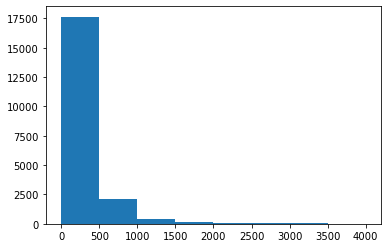

In [610]:
import matplotlib.pyplot as plt
bins=[0,500,1000,1500,2000,2500,3000,3500,4000]
plt.hist(data['Length'],bins=bins)
print('The review with maximum words have {} words'.format(data['Length'].max()))
print('The review with minimum words have {} words'.format(data['Length'].min()))
plt.show()